In [417]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth=200
from sklearn.model_selection import GridSearchCV

In [418]:
df=pd.read_csv('rain.csv')

In [419]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [420]:
df1=df.copy()

In [421]:
print(f'THE SHAPE OF THE DATASET IS {df1.shape}')

THE SHAPE OF THE DATASET IS (8425, 23)


In [422]:
print(f'THE COLUMNS PRESENT IN THE DATASET ARE-- \n\n{df1.columns}')

THE COLUMNS PRESENT IN THE DATASET ARE-- 

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


TOTAL 23 COLUMNS CAN BE SEEN IN THE DATASET!!<BR>
RainTomorrow can be seen as the label and and all the reamining are the features!!<br>

COLUMN DESCRIPTION  FOR THE REFERENCE-<BR>
Date  - The date of observation<BR>
Location  -The common name of the location of the weather station<BR>
MinTemp  -The minimum temperature in degrees celsius<BR>
MaxTemp -The maximum temperature in degrees celsius<BR>
Rainfall  -The amount of rainfall recorded for the day in mm<BR>
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am<BR>
Sunshine  -The number of hours of bright sunshine in the day.<BR>
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight<BR>
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight<BR>
WindDir9am -Direction of the wind at 9am<BR>
WindDir3pm -Direction of the wind at 3pm<BR>
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am<BR>
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm<BR>
Humidity9am -Humidity (percent) at 9am<BR>
Humidity3pm -Humidity (percent) at 3pm<BR>
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am<BR>
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm<BR>
Cloud9am - Fraction of sky obscured by cloud at 9am.<BR> 
Cloud3pm -Fraction of sky obscured by cloud <BR>
Temp9am-Temperature (degrees C) at 9am<BR>
Temp3pm -Temperature (degrees C) at 3pm<BR>
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<BR>
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".<BR>

<B> DATA INFORMATION TYPE

In [423]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

THE DATATYPE IS A MIXTURE OF FLOAT AND OBJECTS!!<BR>

<B> CHECKING FOR THE NULLS!!

In [424]:
feat=[]
null=[]
for i in df1:
    if(df1[i].isnull().sum()>0):
        feat.append(i)
        null.append(df1[i].isnull().sum())
nu=pd.DataFrame({"FEATURE":feat,"NULL PRESENT":null})
nu.sort_values(by='NULL PRESENT',ascending=False,inplace=True)
nu

,FEATURE,NULL PRESENT
4,Sunshine,3994
3,Evaporation,3512
16,Cloud3pm,2455
15,Cloud9am,2421
14,Pressure3pm,1312
13,Pressure9am,1309
5,WindGustDir,991
6,WindGustSpeed,991
7,WindDir9am,829
8,WindDir3pm,308


TOTAL 21 FEATURES ARE SEEN HAVING NULLS AND MUST BE IMPUTED BEFORE WE PROCEED TO FURTHER STEPS!!<BR>
SUNSHINE HOLDS THE MAXIMUM VALUES FOR NULLS<BR>
TEMP9AM HOLDS THE LEAST!<BR>

DESCRIBING THE DATASET(CONTINUOUS)
----------------

In [425]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<B>CATEGORICAL

In [426]:
df1.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,8425,7434,7596,8117,8185,8186
unique,3004,12,16,16,16,2,2
top,2011-01-31,Melbourne,N,N,SE,No,No
freq,5,1622,713,906,813,6195,6195


MAXIMUM RECORDS ARE FROM LOCATION 'MELBOURNE'<BR>
WIND GUST DIRECTION IS NORTH IN 713 CASES AND IT TOPS THE LIST!<BR>
WIND DIRECTION @ 9AM IS NORTH AND DIRECTION @3PM IS SOUTHEAST!<BR>


<B>FOR BETTER UNDERSTANDING OF THE CATEGORICAL COLUMNS LETS MAKE A DATAFRAME AND IDENTIFY THE CATEGORIES! 

In [427]:
#listing continuos and categorical columns separately
cont_col=[]
cat_col=[]
for i in df1:
    if(df1[i].dtype=='O'):
        cat_col.append(i)
    else:
        cont_col.append(i)

In [428]:
ff=[]
tot=[]
uni=[]
for i in cat_col:
    ff.append(i)
    tot.append(len(df1[i].unique()))
    uni.append(df1[i].unique())
info=pd.DataFrame({"FEATURES":ff,"TOTAL UNIQUE":tot,"UNIQUE CATEGORIES":uni})
info

,FEATURES,TOTAL UNIQUE,UNIQUE CATEGORIES
0,Date,3004,"[2008-12-01, 2008-12-02, 2008-12-03, 2008-12-04, 2008-12-05, 2008-12-06, 2008-12-07, 2008-12-08, 2008-12-09, 2008-12-10, 2008-12-11, 2008-12-12, 2008-12-13, 2008-12-14, 2008-12-15, 2008-12-16, 200..."
1,Location,12,"[Albury, CoffsHarbour, Newcastle, Penrith, Williamtown, Wollongong, Melbourne, Brisbane, Adelaide, PerthAirport, Darwin, Uluru]"
2,WindGustDir,17,"[W, WNW, WSW, NE, NNW, N, NNE, SW, nan, ENE, SSE, S, NW, SE, ESE, E, SSW]"
3,WindDir9am,17,"[W, NNW, SE, ENE, SW, SSE, S, NE, nan, SSW, N, WSW, ESE, E, NW, WNW, NNE]"
4,WindDir3pm,17,"[WNW, WSW, E, NW, W, SSE, ESE, ENE, NNW, SSW, SW, SE, N, S, NNE, nan, NE]"
5,RainToday,3,"[No, Yes, nan]"
6,RainTomorrow,3,"[No, Yes, nan]"


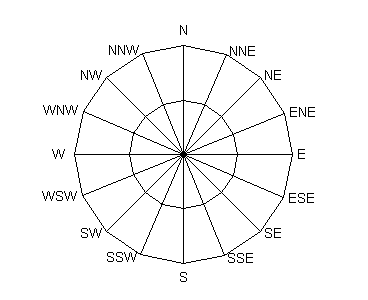

DATA IS COLLECTED FROM 12 DIFFERENT LOCATIONS<BR>
WIND DIRECTIONS CAN BE SEEN IN THE ABOVE IMAGE<BR>


<b>CHECKING IF OUR LABEL IS BALANCED ?

In [429]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

IMBALANCE IN THE DATASET CAN BE SEEN AND WE WILL HAVE TO BALANCE THIS USING SMOTE<BR>

CHECKING THE CORRELATION AMONG THE CONTINUOS FEATURES WITHOUT ANY IMPUTAIONS AND ON THE RAW DATASET(TO GET A ROUGH IDEA)
----------

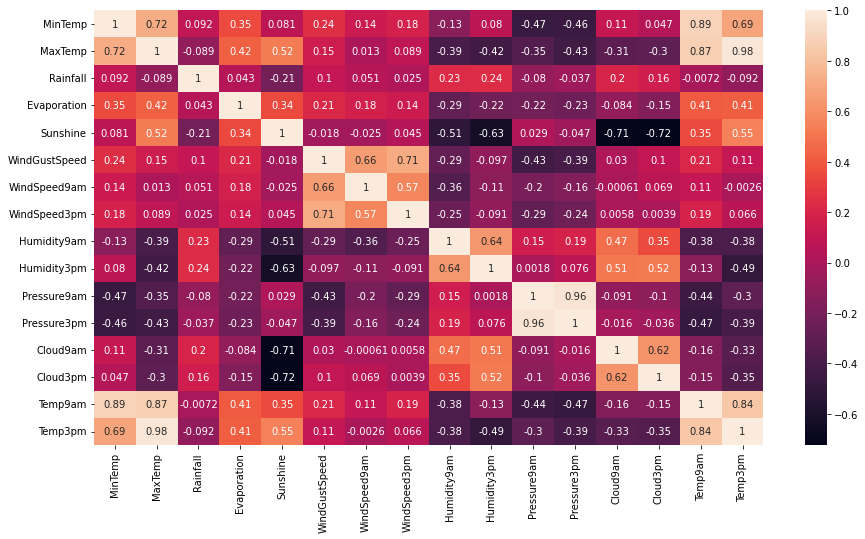

In [430]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':10})
plt.show()

<B> TO CHECK IF THE CORRELATIONS ARE GREATER THAN 0.80 AS WE KNOW HIGH COLLIENARITY CAN INTRODUCE THE ISSUE OF MULTI-COLLINEARITY AMONG THE FEATURES AND WE DONT WANT THAT!

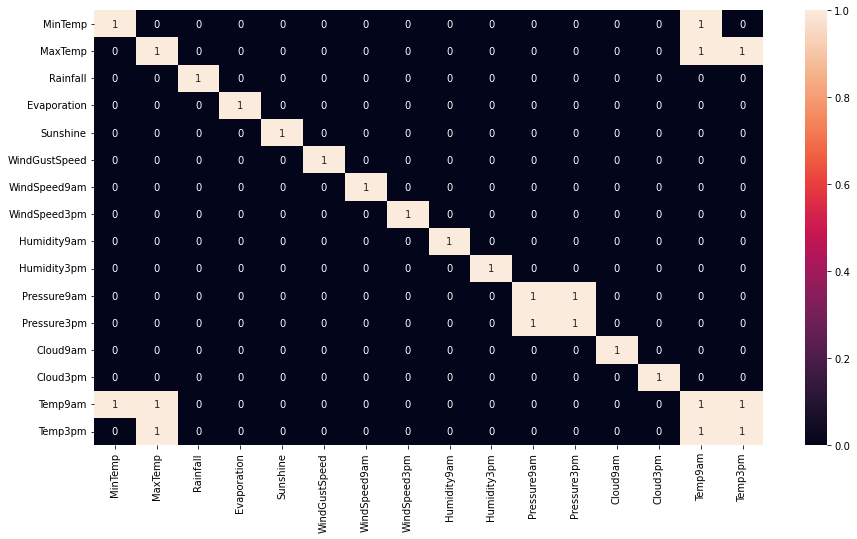

In [431]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr()>=0.8,annot=True,annot_kws={'size':10})
plt.show()

MIN TEMP,MAX TEMP ,TEMP9AM,TEMP3PM ARE SEEN HAVING THE CORRELATIONS GREATER THAN EQAUL TO 0.8 AND WE HAVE TO HANDLE THIS BY DROPIING SUITABLE COLUMNS SO WE CAN BRING DOWN THE SCOPE OF MULTICOLLINEARITY AMONG THESE FEATURES

HANDLING THE NULLS!!
----------------

<B>ITS VERY IMPORTANT TO NOTE THAT AS THE WEATHER CONDITIONS AND MANY PARAMETERS LIKE HUMIDITY ,TEMPERATURE,SUNSHINE,WIND DIRECTION AND SPEED AND MANY MORE CHANGES WITH THE SEASONS, IT WILL BE MUCH BETTER IF IMPUTE THE NULLS USING THE YEAR AND MONTH<BR><BR>
<B>FOR THIS WE WILL BE  CREATING SEPARATE COLUMNS FOR "YEAR" AND "MONTH"<BR><BR>
<B>ITS  ALSO BROUGHT IN OUR CONSIDERATION  THAT OVER THE YEARS AS THE ISSUES LIKE GLOBAL WARMING ,DEFORESTATION ,MELTNG OF GLACIERS AND MANY MORE ACCELERATES A DRASTIC CHANGE IN THE ENVIRONMENT AND ATMOSPHERE CAN BE OBSERVED ,LEADING TO IMBALANCE OF THE SEASONAL CAHNGES , YEAR WISE ANALYSIS WILL HELP US IDENTIFY THESE CHANGING PATTERNS TOO 

In [432]:
dft=df1.copy()

In [433]:
#creating empty lists for month and year which will be appended later 
month=[]
year=[]

In [434]:
for i in dft['Date']:
    res=i.split('-')
    month.append(int(res[1]))
    year.append(int(res[0]))

In [435]:
dft['YEAR']=year
dft['MONTH']=month

In [436]:
col=['Date',
     'YEAR',
     'MONTH',
     
     
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

dft=dft[col]

In [437]:
dft.head()

,Date,YEAR,MONTH,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2008,12,Albury,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,2008,12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,2008,12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,2008,12,Albury,9.2,28.0,0.0,NaN,NaN,NE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,2008,12,Albury,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [438]:
dft['YEAR'].value_counts()

2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: YEAR, dtype: int64

we have data ranging from year 2008 to 2017<br>
2011 HAVE THE HIGHEST COUNTS OF DATA<BR>

In [439]:
dft['MONTH'].value_counts()

6     818
5     801
3     761
1     753
12    741
7     732
8     682
10    655
11    653
2     620
9     609
4     600
Name: MONTH, dtype: int64

DATA LOOKS BALANCED FOR ALMOST ALL THE MONTHS 

In [440]:
nu

,FEATURE,NULL PRESENT
4,Sunshine,3994
3,Evaporation,3512
16,Cloud3pm,2455
15,Cloud9am,2421
14,Pressure3pm,1312
13,Pressure9am,1309
5,WindGustDir,991
6,WindGustSpeed,991
7,WindDir9am,829
8,WindDir3pm,308


LETS CHECK HOW THE MEAN TEMPERATURES VARIES OVER THE YEARS!

In [441]:
dte=dft.groupby('YEAR').mean()

In [442]:
dte['YEAR']=dte.index

In [443]:
dte

,MONTH,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,YEAR
YEAR,,,,,,,,,,,,,,,,,,
2008,12.000000,15.717241,25.201124,2.804651,NaN,NaN,48.829545,17.000000,22.528090,64.954023,58.146067,1009.719355,1007.636559,6.153846,5.565217,19.947126,22.912360,2008
2009,6.537964,12.996029,22.910292,3.194489,4.817257,7.906941,41.086921,14.099676,19.647488,66.812298,54.561588,1017.585101,1015.295142,4.982850,4.705210,17.410761,21.450890,2009
2010,6.473319,11.968172,21.908061,2.780919,4.232276,6.574628,40.955213,15.744622,19.881944,69.191534,53.138696,1018.512829,1016.317684,5.071306,5.055603,15.852880,20.501110,2010
2011,6.481608,13.048365,23.242847,2.600590,4.720424,7.143252,40.300346,15.459128,18.652797,66.095368,50.189891,1017.471166,1015.253279,4.446922,4.490741,17.241894,21.757104,2011
2012,5.549171,15.939270,27.209292,2.613677,5.586047,8.672031,37.951740,14.333702,17.681768,63.183628,46.496133,1016.642431,1013.613481,3.667804,3.679954,21.103429,25.851934,2012
2013,7.744015,12.147358,24.529926,2.310681,5.264881,8.618694,43.341317,12.512104,18.337687,64.677239,47.326493,1017.320772,1014.885757,3.565299,3.710821,18.047114,23.034142,2013
2014,7.039625,12.692628,24.216205,1.926243,5.995098,9.093210,38.059022,9.135394,14.488197,66.380597,47.704936,1018.594022,1016.280707,3.950690,4.105578,17.549360,22.815434,2014
2015,6.176110,13.012995,23.956872,3.373418,10.327660,8.502778,34.490050,7.122835,13.763727,75.194313,53.350000,1017.235616,1014.826027,4.373219,4.659574,17.409449,22.801664,2015
2016,6.513661,13.306575,24.454372,3.424179,9.123364,8.311864,42.556548,17.844875,22.505495,69.497268,51.758904,1017.462842,1014.792896,5.609524,4.911215,18.531967,23.086885,2016


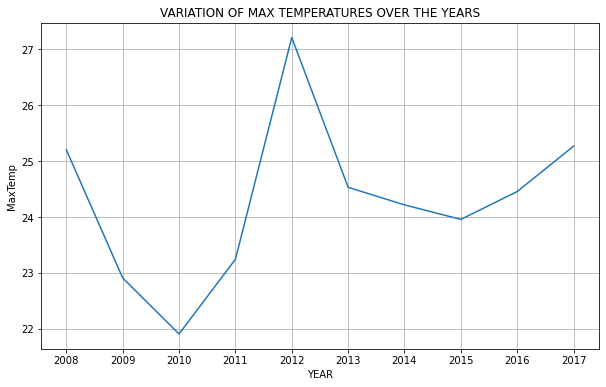

In [444]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.lineplot(x=dte['YEAR'],y=dte['MaxTemp'])
plt.title("VARIATION OF MAX TEMPERATURES OVER THE YEARS")
plt.xticks(np.arange(2008,2018))
plt.show()

GRADUAL DECREASE IN MAX TEMP FROM 208 RO 2010 THEN A SUDDEN INCREASE TILL THE YEAR 2012!<BR>


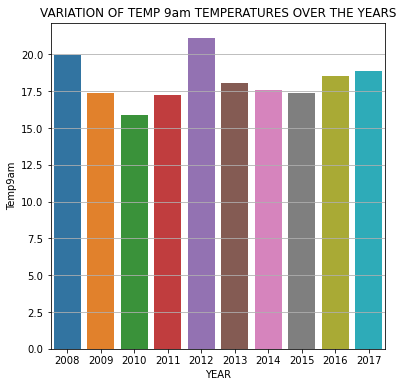

In [445]:
plt.figure(figsize=(6,6))
plt.grid(True)
sns.barplot(x=dte['YEAR'],y=dte['Temp9am'])
plt.title("VARIATION OF TEMP 9am TEMPERATURES OVER THE YEARS")
plt.show()

ITS VERY CLEAR FOR THE ABOVE THAT 2012 WAS THE HOTTEST YEAR AMONG ALL <BR>
REST THE VARIATION IN TEMPERATURES FOLLOWED THE SAME PATTERN FOR EVERY PLOT<BR>


NOW LETS CHECK THE MAXIMUM TEMPERATURE VARIATION OVER THE MONTHS !

In [446]:
dtm=dft.groupby('MONTH').mean().reset_index()

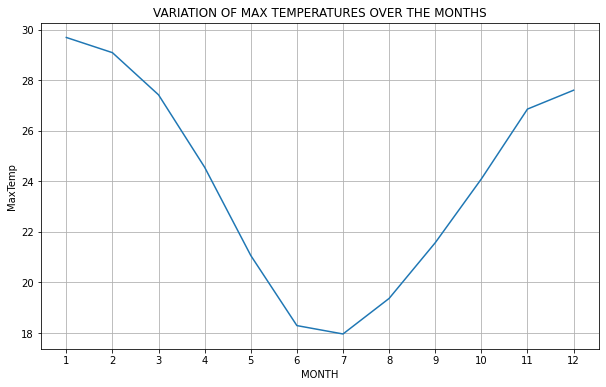

In [447]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.lineplot(x=dtm['MONTH'],y=dtm['MaxTemp'])
plt.xticks(np.arange(1,13))
plt.title("VARIATION OF MAX TEMPERATURES OVER THE MONTHS")
plt.show()

A VERY STRONG PATTERN CAN BE OBSERVED OVER THE MONTHS WITH THE MINIMUM AND MAXIMUM TEMPERATURES DROPPING OVER THE MONTH FROM JANUARY TO JUNE AND JULY AND THEN RISING AGAIN TO DECEMBER

<B> WE WILL BE USING BOTH YEAR AND THE MONTH TO IMPUTE THE NULLS PRESENT IN MINTEMP,MAXTEMP,TEMP3PM,TEMP9AM

GROUPED BY YEAR AND MONTHS!

In [448]:
ss=dft.groupby(['YEAR','MONTH']).mean()

In [449]:
ss

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
YEAR MONTH                                                          
2008 12     15.717241  25.201124  2.804651          NaN       NaN   
2009 1      17.781720  28.737634  0.445161          NaN       NaN   
     2      18.203571  26.972619  2.766667          NaN       NaN   
     3      16.736522  25.513043  1.826087     4.266667  7.331818   
     4      13.955000  21.870833  5.717647     3.062069  5.816667   
...               ...        ...       ...          ...       ...   
2017 2      20.264286  31.021429  2.107143          NaN       NaN   
     3      19.025806  26.461290  7.496774          NaN       NaN   
     4      13.333333  23.540000  3.953333          NaN       NaN   
     5       9.800000  22.039474  0.310526          NaN       NaN   
     6       8.233333  19.377027  6.170667          NaN       NaN   

            WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
YEAR MONTH                                                           
2008 12         48.829545     17.000000     22.528090    64.954023   
2009 1          47.494624     14.989247     22.913978    61.258065   
     2          45.182927     15.000000     21.144578    68.321429   
     3          38.252174     11.817391     18.721739    71.017391   
     4          42.325000     14.725000     19.325000    69.800000   
...                   ...           ...           ...          ...   
2017 2          45.480000     14.230769     24.038462    70.321429   
     3          44.866667     14.225806     21.967742    87.193548   
     4          38.241379     14.866667     20.800000    79.733333   
     5          33.144737     13.921053     17.552632    76.118421   
     6          34.351351     15.866667     16.613333    75.466667   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
YEAR MONTH                                                              
2008 12       58.146067  1009.719355  1007.636559  6.153846  5.565217   
2009 1        50.021505  1014.344086  1011.876344  6.521739  5.941176   
     2        55.952381  1014.290476  1012.264286  6.772727  5.722222   
     3        59.391304  1017.626087  1015.650435  5.553571  4.923077   
     4        60.283333  1019.016667  1016.632500  5.833333  5.560976   
...                 ...          ...          ...       ...       ...   
2017 2        54.285714  1014.317857  1011.982143  5.416667  5.916667   
     3        70.451613  1015.219355  1013.609677  7.076923  6.423077   
     4        55.133333  1022.180000  1019.396667  6.450000  4.875000   
     5        52.210526  1022.430263  1019.696053  6.870968  5.411765   
     6        55.373333  1026.089333  1023.372000  6.214286  6.714286   

              Temp9am    Temp3pm  
YEAR MONTH                        
2008 12     19.947126  22.912360  
2009 1      22.159140  26.844086  
     2      21.340476  25.675000  
     3      19.928696  24.039130  
     4      17.703333  20.840000  
...               ...        ...  
2017 2      24.735714  29.207143  
     3      21.532258  25.083871  
     4      17.790000  22.266667  
     5      15.038158  20.998684  
     6      12.137333  18.430667  

[100 rows x 16 columns]

<B>IMPUTING MinTemp grouped by year and month mean value

In [450]:
dft['MinTemp'] = dft.groupby(['YEAR','MONTH'], sort=False)['MinTemp'].apply(lambda x: x.fillna(x.mean()))

<B>IMPUTING MaxTemp grouped by year and month mean value

In [451]:
dft['MaxTemp'] = dft.groupby(['YEAR','MONTH'], sort=False)['MaxTemp'].apply(lambda x: x.fillna(x.mean()))

<B>IMPUTING Temp9am grouped by year and month mean value

In [452]:
dft['Temp9am'] = dft.groupby(['YEAR','MONTH'], sort=False)['Temp9am'].apply(lambda x: x.fillna(x.mean()))

<B>IMPUTING Temp3pm grouped by year and month mean value

In [453]:
dft['Temp3pm'] = dft.groupby(['YEAR','MONTH'], sort=False)['Temp3pm'].apply(lambda x: x.fillna(x.mean()))

In [454]:
dft[['MinTemp','MaxTemp','Temp3pm','Temp9am']].isna().sum()

MinTemp    0
MaxTemp    0
Temp3pm    0
Temp9am    0
dtype: int64

SUCESSFULLY IMPUTED ALL THE TEMPERATURES COLUMNS!

In [455]:
dft.isna().sum()

Date                0
YEAR                0
MONTH               0
Location            0
MinTemp             0
MaxTemp             0
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am             0
Temp3pm             0
RainToday         240
RainTomorrow      239
dtype: int64

<b> IMPUTING RAINFALL USING THE YEAR (GROUPING BY YEAR AND IMPUTING THE NULLS IN EACH YEAR USING THE MEAN OF THE RAINFALL VALUE IN EACH YEAR)

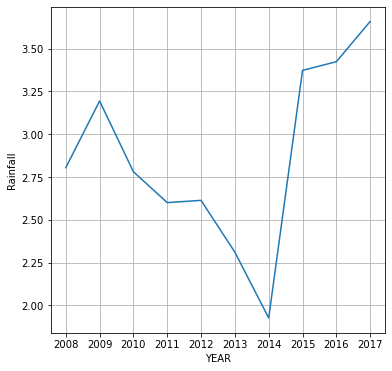

In [456]:
plt.figure(figsize=(6,6))
plt.grid(True)
sns.lineplot(x=dte['YEAR'],y=dte['Rainfall'])
plt.xticks(np.arange(2008,2018))
plt.show()

<B>IMPUTING Rainfall grouped by year  mean value

In [457]:
dft['Rainfall'] = dft.groupby(['YEAR'], sort=False)['Rainfall'].apply(lambda x: x.fillna(x.mean()))

<B>IMPUTING SUNSHINE grouped by MONTH  mean value

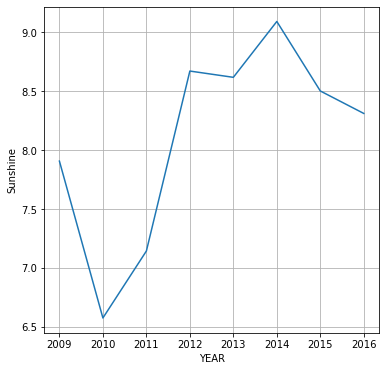

In [458]:
plt.figure(figsize=(6,6))
plt.grid(True)
sns.lineplot(x=dte['YEAR'],y=dte['Sunshine'])
plt.show()

In [459]:
dft['Sunshine']= dft.groupby(['MONTH'], sort=False)['Sunshine'].apply(lambda x: x.fillna(x.mean()))

<B>IMPUTING EVAPORATION using SUNSHINE WITH KNN IMPUTER

In [460]:
from sklearn.impute import KNNImputer

In [461]:
knn=KNNImputer(n_neighbors=5)

In [462]:
fkk=pd.DataFrame(knn.fit_transform(dft[['Sunshine','Evaporation']]))

In [463]:
dft['Evaporation']=fkk[1]

<B>IMPUTING WindGustSpeed GROUPED BY MONTH AND YEAR MEANS

In [464]:
dft['WindGustSpeed']= dft.groupby(['YEAR','MONTH'], sort=False)['WindGustSpeed'].apply(lambda x: x.fillna(x.mean()))

<B>IMPUTING WindGustDir,WindDir9am,WindDir3pm  USING SIMPLE IMPUTER

In [465]:
from sklearn.impute import SimpleImputer

In [466]:
si=SimpleImputer(strategy='most_frequent')

In [467]:
dft['WindGustDir']=si.fit_transform(dft['WindGustDir'].values.reshape(-1,1))

In [468]:
dft['WindDir9am']=si.fit_transform(dft['WindDir9am'].values.reshape(-1,1))

In [469]:
dft['WindDir3pm']=si.fit_transform(dft['WindDir3pm'].values.reshape(-1,1))

<B>IMPUTING WindSpeed9am ,WindSpeed3pm  

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindSpeed3pm'>

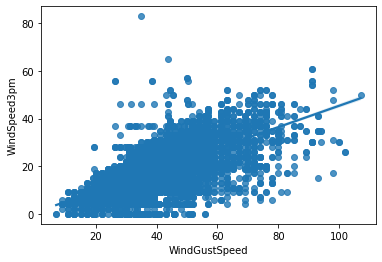

In [470]:
sns.regplot(x=dft['WindGustSpeed'],y=dft['WindSpeed3pm'])

A STRONG COORELATION BETWEEN THE TWO ENCOURAGES US TO USE ITERATIVE IMPUTER

In [471]:
from sklearn.experimental import enable_iterative_imputer

In [472]:
from sklearn.impute import IterativeImputer

In [473]:
from sklearn.linear_model import LinearRegression

In [474]:
lr=LinearRegression()

In [475]:
ii=IterativeImputer(lr)

In [476]:
new=pd.DataFrame(ii.fit_transform(dft[['WindGustSpeed','WindSpeed9am']]),columns=['WindGustSpeed','WindSpeed9am'])

In [477]:
new2=pd.DataFrame(ii.fit_transform(dft[['WindGustSpeed','WindSpeed3pm']]),columns=['WindGustSpeed','WindSpeed3pm'])

In [478]:
dft['WindSpeed9am']=new['WindSpeed9am']
dft['WindSpeed3pm']=new2['WindSpeed3pm']

<B> IMPUTING Humidity3pm ,Humidity9am

<AxesSubplot:xlabel='Sunshine', ylabel='Humidity3pm'>

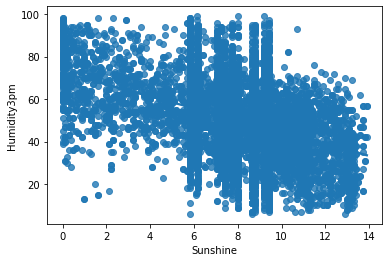

In [479]:
sns.regplot(x=dft['Sunshine'],y=dft['Humidity3pm'])

INCREASING SUNSHINE TENDS TO DECRESE THE HUMIDITY

In [480]:
new3=pd.DataFrame(ii.fit_transform(dft[['Sunshine','Humidity3pm']]))
new4=pd.DataFrame(ii.fit_transform(dft[['Sunshine','Humidity9am']]))

In [481]:
dft['Humidity3pm']=new3[1]
dft['Humidity9am']=new4[1]

<B> IMPUTING PRESSURE9AM AND PRESSURE3PM GROUPED BY YEAR AND MONTH AND USING THE MEANS 

In [482]:
dft['Pressure9am'] = dft.groupby(['MONTH'], sort=False)['Pressure9am'].apply(lambda x: x.fillna(x.mean()))
dft['Pressure3pm'] = dft.groupby(['MONTH'], sort=False)['Pressure3pm'].apply(lambda x: x.fillna(x.mean()))

<B> IMPUTING CLOUD9AM ,CLOUD3PM USING SUNSHINE WITH  ITERATIVE IMPUTER

In [483]:
new5=pd.DataFrame(ii.fit_transform(dft[['Sunshine','Cloud3pm']]))
new6=pd.DataFrame(ii.fit_transform(dft[['Sunshine','Cloud9am']]))

In [484]:
dft['Cloud3pm']=new5[1]
dft['Cloud9am']=new6[1]

<B>IMPUTING NULLS PRESENT IN RAIN TODAY,RAIN TOMORROW USING SIMPLE IMPUETER AND MOST FREQUENT METHOD!

In [485]:
dft['RainToday']=si.fit_transform(dft['RainToday'].values.reshape(-1,1))
dft['RainTomorrow']=si.fit_transform(dft['RainTomorrow'].values.reshape(-1,1))

In [486]:
dft.isnull().sum()

Date             0
YEAR             0
MONTH            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<B>ALL THE NULLS IMPUTED SUCCESFULLY!!

EXPLORATORY DATA ANALYSIS!!
-------

LETS CHECK HOW DIFFERENT PARAMETER CHANGES OVER THE YEARS(2011-2017)

In [487]:
dte=dft.groupby('YEAR').mean()

In [488]:
dte['YEAR']=dte.index

In [489]:
dte

,MONTH,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,YEAR
YEAR,,,,,,,,,,,,,,,,,,
2008,12.000000,15.717241,25.201124,2.804651,14.040000,8.804043,48.829545,17.260499,22.525973,64.961660,57.703774,1009.719355,1007.636559,4.910404,4.752804,19.947126,22.912360,2008
2009,6.537964,12.991373,22.907306,3.194489,5.616381,7.647972,41.105824,14.090590,19.645363,66.819305,54.555219,1017.587209,1015.292850,4.841626,4.622629,17.407423,21.446368,2009
2010,6.473319,11.977020,21.922379,2.780919,4.803160,6.843239,40.979958,15.738959,19.875071,69.212302,53.134466,1018.513662,1016.318728,4.995762,4.977896,15.857401,20.499450,2010
2011,6.481608,13.048365,23.242847,2.600590,4.955749,7.218163,40.296677,15.459128,18.652796,66.095368,50.191705,1017.473184,1015.255105,4.607415,4.637843,17.241894,21.752600,2011
2012,5.549171,15.942341,27.211611,2.613677,5.582365,8.674794,37.984180,14.333702,17.681768,63.181204,46.496133,1016.642431,1013.613481,3.663474,3.674012,21.105664,25.851934,2012
2013,7.744015,12.135944,24.517815,2.310681,5.750939,8.199352,43.849654,12.552050,18.372041,64.713413,47.369005,1017.583010,1015.136888,3.580207,3.720161,18.042976,23.033321,2013
2014,7.039625,12.729467,24.275925,1.926243,6.347132,7.783858,38.527086,9.254104,14.625045,66.395860,47.791103,1018.164506,1015.774586,4.294695,4.348028,17.607015,22.878803,2014
2015,6.176110,13.015011,23.949528,3.373418,6.458867,7.605050,32.419248,7.178915,13.806365,74.993398,53.250832,1018.111090,1015.672544,4.517389,4.651436,17.403734,22.629683,2015
2016,6.513661,13.321075,24.454372,3.424179,8.302514,7.622364,42.958540,17.846210,22.500590,69.497268,51.758774,1017.462842,1014.792896,5.238285,4.781918,18.531967,23.086885,2016


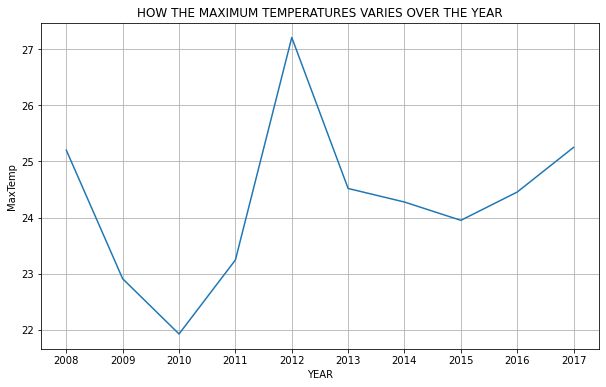

In [490]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xticks(np.arange(2008,2018))
plt.title("HOW THE MAXIMUM TEMPERATURES VARIES OVER THE YEAR")
sns.lineplot(x=dte['YEAR'],y=dte['MaxTemp'])
plt.show()

Max temperatures are seen decreasing from 2008 to 2010 a sudden increases can be seen till 2012!<br>
Maximum/Minimum temperatures reached are highest in 2012<br>
A steep increase can be seen from 2015 onwards!<br>

In [491]:
dft

,Date,YEAR,MONTH,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2008,12,Albury,13.4,22.900000,0.6,14.04,8.804043,W,...,71.0,22.0,1007.7,1007.1,8.000000,3.957676,16.9,21.8,No,No
1,2008-12-02,2008,12,Albury,7.4,25.100000,0.0,14.04,8.804043,WNW,...,44.0,25.0,1010.6,1007.8,4.012362,3.957676,17.2,24.3,No,No
2,2008-12-03,2008,12,Albury,12.9,25.700000,0.0,14.04,8.804043,WSW,...,38.0,30.0,1007.6,1008.7,4.012362,2.000000,21.0,23.2,No,No
3,2008-12-04,2008,12,Albury,9.2,28.000000,0.0,14.04,8.804043,NE,...,45.0,16.0,1017.6,1012.8,4.012362,3.957676,18.1,26.5,No,No
4,2008-12-05,2008,12,Albury,17.5,32.300000,1.0,14.04,8.804043,W,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,2017,6,Uluru,2.8,23.400000,0.0,5.28,5.840431,E,...,51.0,24.0,1024.6,1020.3,5.474893,5.392823,10.1,22.4,No,No
8421,2017-06-22,2017,6,Uluru,3.6,25.300000,0.0,5.28,5.840431,NNW,...,56.0,21.0,1023.5,1019.1,5.474893,5.392823,10.9,24.5,No,No
8422,2017-06-23,2017,6,Uluru,5.4,26.900000,0.0,5.28,5.840431,N,...,53.0,24.0,1021.0,1016.8,5.474893,5.392823,12.5,26.1,No,No
8423,2017-06-24,2017,6,Uluru,7.8,27.000000,0.0,5.28,5.840431,SE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


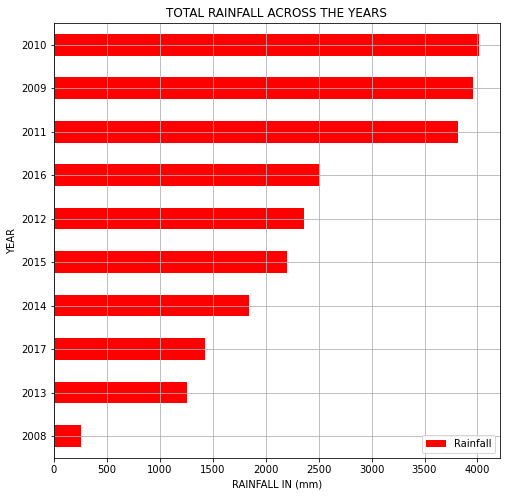

In [492]:
dft.groupby('YEAR').sum().reset_index().sort_values(by='Rainfall',ascending=True).plot(kind='barh',y='Rainfall',x='YEAR',figsize=(8,8),facecolor='Red')
plt.xlabel("RAINFALL IN (mm)")
plt.title("TOTAL RAINFALL ACROSS THE YEARS")
plt.grid(True)
plt.show()

Maximum rainfall was recorded in 2010 with the total rainfall reaching around 4000 mm<br>
2008 remains the dryest year as it records the least and rainfall levels less than 500mm<br>


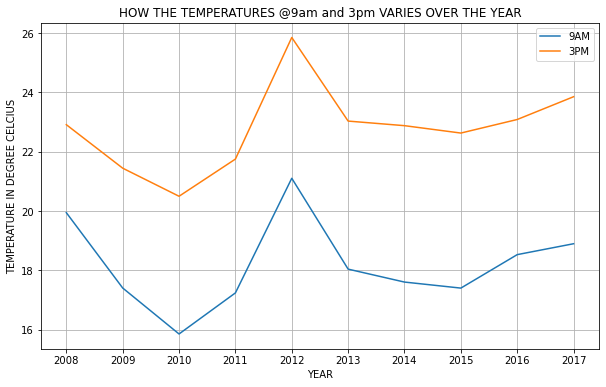

In [493]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xticks(np.arange(2008,2018))
plt.title("HOW THE TEMPERATURES @9am and 3pm VARIES OVER THE YEAR")
ax=sns.lineplot(x=dte['YEAR'],y=dte['Temp9am'],label='9AM')
sns.lineplot(x=dte['YEAR'],y=dte['Temp3pm'],label='3PM')
plt.ylabel("TEMPERATURE IN DEGREE CELCIUS")
plt.legend()
plt.show()

BOTH TEMPERATURES 9AM AND 3PM VARY WITH THE SAME PATTERNS WITH TEMP @3PM BEING HIGHER AND ITS QUIET OBVIOUS!!
2012 has recorded the highest temperatures at both 9am and 3pm across all the years!

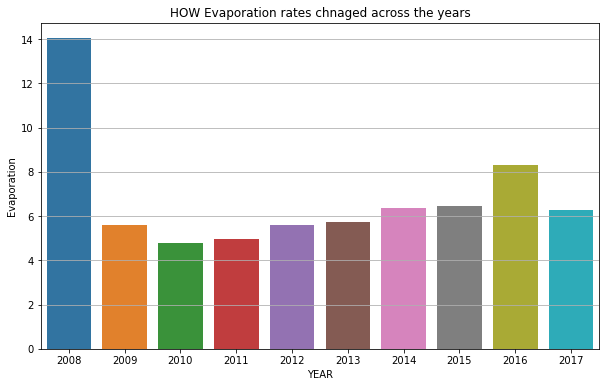

In [494]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xticks(np.arange(2008,2018))
plt.title("HOW Evaporation rates chnaged across the years")
sns.barplot(x=dte['YEAR'],y=dte['Evaporation'])
plt.show()

Though the rates decrease drastically from 2008 to 2009 and further but a clear increase in the rates from 2009 to 2016 can be observed<br>
Excess evaporation is also not good as it leads to desertation and regions with limited rainfall faces the negative effects<br>
A balanced rate is always good as it keeps the rain cycle in motion leading to a good shift across the seasons!<br>

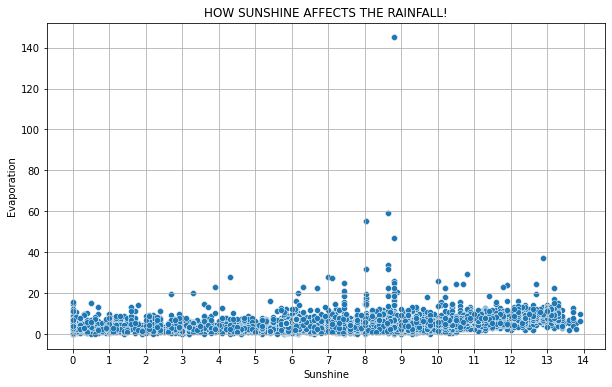

In [495]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.scatterplot(x=dft['Sunshine'],y=dft['Evaporation'])
plt.xticks(np.arange(0,15,1))
plt.title("HOW SUNSHINE AFFECTS THE RAINFALL!")
plt.show()

A contant kind of relation can be seen of evaporation with the sunshine!!
Obviously increased density can be observed as the rates of sunshine increases!<br>


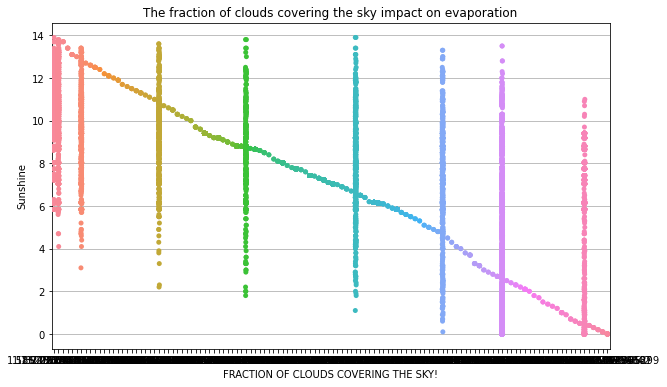

In [496]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.stripplot(x=dft['Cloud3pm'],y=dft['Sunshine'])
plt.xlabel("FRACTION OF CLOUDS COVERING THE SKY!")
plt.title("The fraction of clouds covering the sky impact on evaporation")
plt.show()

As the fraction of clouds covering the sky increases it becomes tough for the sun rays to penetrate through them and the scope of sunshine decreases in a descent manner!<br>
A good correlation can be among the two

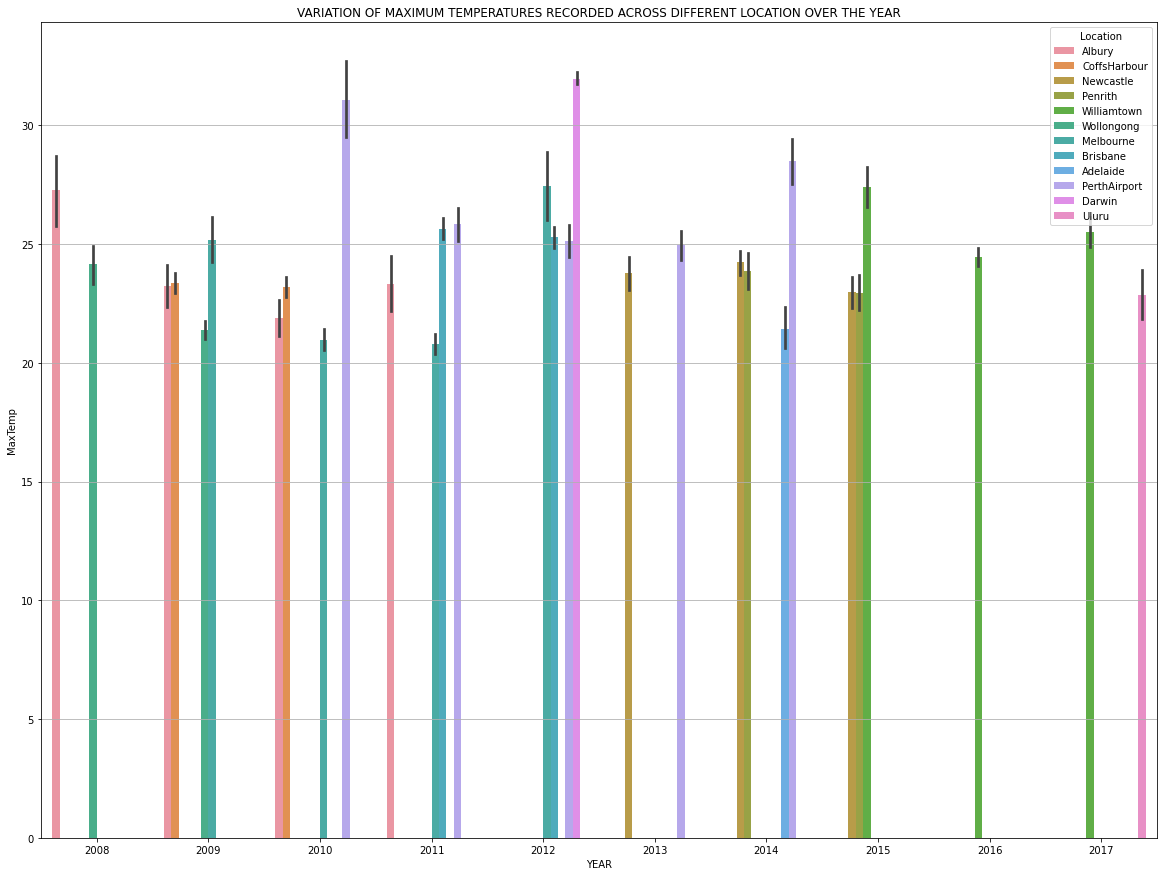

In [497]:
plt.figure(figsize=(20,15))
plt.grid(True)
sns.barplot(x=dft['YEAR'],y=dft['MaxTemp'],hue=dft['Location'])
plt.title("VARIATION OF MAXIMUM TEMPERATURES RECORDED ACROSS DIFFERENT LOCATION OVER THE YEAR")
plt.show()

<B> LETS CHECK THE MONTHLY VARIATION OF DIFFERENT FEATURES BY GROUPING BY MEAN!

In [498]:
dtm=dft.groupby('MONTH').mean().reset_index()

In [499]:
dtm['MONTH']=dtm['MONTH'].map({1:'JANUARY',2:'FEBRUARY',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUGUST',9:'SEPTEMBER',10:'OCTOBER',11:'NOVEMBER',12:'DECEMBER'})

In [500]:
dtm

,MONTH,YEAR,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,JANUARY,2012.312085,18.355361,29.695451,2.918943,8.520425,9.406601,44.247330,15.369949,21.405100,62.165343,47.688456,1013.245000,1011.125909,4.233216,3.916671,23.065871,27.871685
1,FEBRUARY,2012.283871,18.816561,29.088677,3.249269,7.812774,9.187584,42.242631,13.885723,19.222667,67.400970,52.063836,1014.918284,1012.769590,4.317022,4.167167,22.840715,27.532210
2,MARCH,2012.198423,17.166172,27.424314,3.138835,6.174297,7.739713,39.683517,12.744383,18.564529,70.332834,52.804761,1017.043413,1014.798201,4.722139,4.501369,20.998642,25.956413
3,APRIL,2012.450000,14.632070,24.557698,4.101571,3.524867,7.037500,37.302513,13.183990,17.338170,70.883281,54.488150,1019.522353,1016.910588,5.050213,4.880977,19.107325,23.279985
4,MAY,2012.272160,10.687612,21.060766,1.964281,4.966267,6.130597,34.656833,13.041695,16.083296,72.615166,53.621435,1020.434388,1017.824173,4.960562,4.999633,15.058020,20.001783
5,JUNE,2012.359413,8.819587,18.293615,3.402457,3.857995,5.840431,35.536650,12.659896,15.009209,76.044999,57.463910,1020.950592,1018.494675,5.064548,5.125729,12.385052,17.192998
6,JULY,2011.964481,7.766669,17.960097,1.813125,2.429508,6.166129,36.955765,12.796628,16.390034,73.127613,53.488985,1021.000696,1018.505556,4.664697,4.687728,11.715542,16.875738
7,AUGUST,2012.181818,8.347691,19.367794,1.956581,3.638416,7.218548,37.374438,12.558758,16.854916,69.721925,50.278068,1019.713878,1016.956736,4.228872,4.551693,13.290533,18.220964
8,SEPTEMBER,2012.004926,10.540024,21.571355,1.847325,4.329852,7.429310,42.666329,14.775965,19.570750,63.673883,48.598741,1017.963052,1015.195363,4.347130,4.502488,16.162816,20.116433
9,OCTOBER,2011.822901,12.552275,24.095112,3.040466,6.831450,8.030280,42.155540,15.086923,20.649598,63.312720,47.749199,1018.312989,1015.921250,4.360560,4.264896,17.881236,22.454605


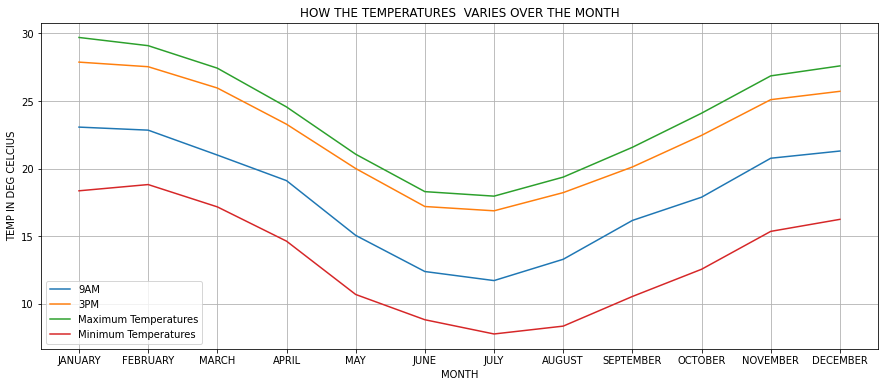

In [501]:
plt.figure(figsize=(15,6))
plt.grid(True)
plt.title("HOW THE TEMPERATURES  VARIES OVER THE MONTH")
ax=sns.lineplot(x=dtm['MONTH'],y=dtm['Temp9am'],label='9AM')
sns.lineplot(x=dtm['MONTH'],y=dtm['Temp3pm'],label='3PM')
sns.lineplot(x=dtm['MONTH'],y=dtm['MaxTemp'],label='Maximum Temperatures')
sns.lineplot(x=dtm['MONTH'],y=dtm['MinTemp'],label='Minimum Temperatures')
plt.ylabel("TEMP IN DEG CELCIUS")
plt.legend()
plt.show()

The three hottest months December, January and February<br>
Autumn - the transition months March, April and May<br>
Winter - the three coldest months June, July and August<br>

In [502]:
temp=dft.groupby('MONTH').sum().reset_index().sort_values(by='Rainfall',ascending=False)
temp['MONTH']=temp['MONTH'].map({1:'JANUARY',2:'FEBRUARY',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUGUST',9:'SEPTEMBER',10:'OCTOBER',11:'NOVEMBER',12:'DECEMBER'})

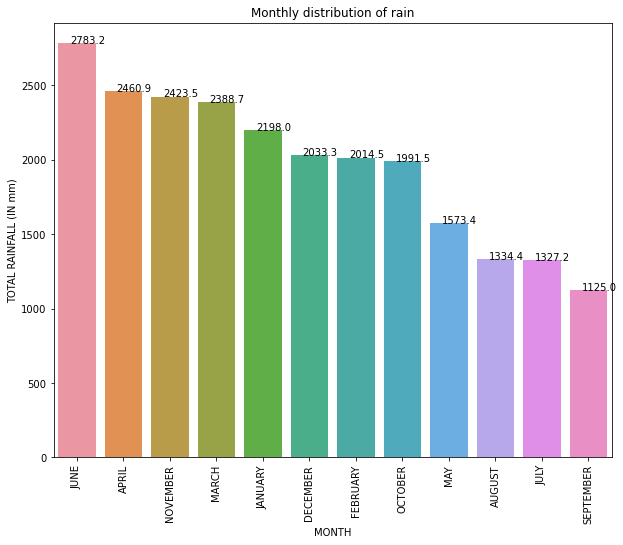

In [503]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=temp['MONTH'],y=temp['Rainfall'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Monthly distribution of rain")
plt.xticks(rotation=90)
plt.ylabel("TOTAL RAINFALL (IN mm)")
plt.show()

It can be observed that<br>
June,April and November are the months of highest rainfall recorded (in mm)<br>
Minimum rains were recorded in september recording only 1125 mm of rain which is quiet low comapratively to other Months!

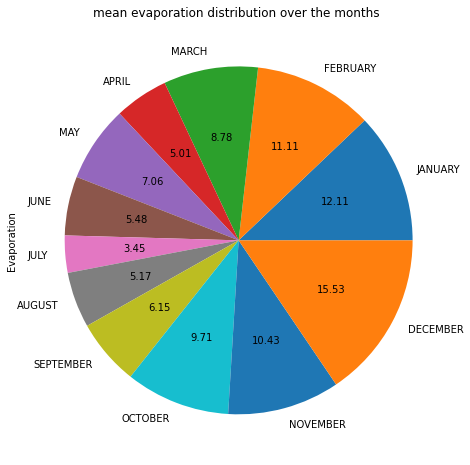

In [504]:
plt.figure(figsize=(8,8))
plt.title("mean evaporation distribution over the months ")
dtm.set_index('MONTH')['Evaporation'].plot(kind='pie',autopct='%.2f')
plt.show()

JANUARY AND DECEMBER ARE THE HOTTEST MONTHS WHICH HAVE COMPARATIVELY HIGHER RATES OF EVAPORATION!<BR>
JULY IS AMONG THE COLDEST MONTHS WITH LOW RAINFALL AND LESSER RATES OF EVAPORATION


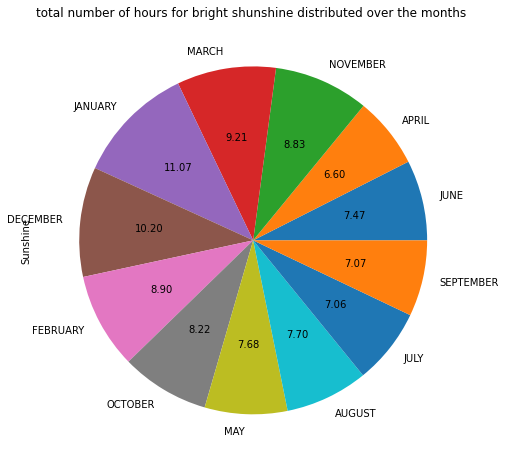

In [505]:
plt.figure(figsize=(8,8))
plt.title("total number of hours for bright shunshine distributed over the months ")
temp.set_index('MONTH')['Sunshine'].plot(kind='pie',autopct='%.2f')
plt.show()

COMPLIMENTARY TO THE ABOVE PLOT THIS PLOT ALSO HELPS UP INFER THAT total EVAPORATION levels and sunshine hours are highly correlated to each other as <br>
December and january have the highest total number of hours of bright sunshine  and the transtion month april having the lowest as its among the rainy seasons leading more number of clouds over the sky and less number of active sunshine!<br>

<B>HOW THE WINDS SPEED VARY OVER DIFFERENT MONTHS 

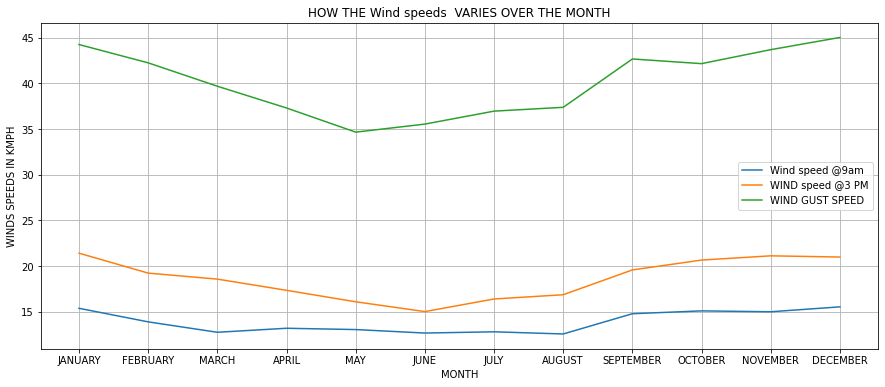

In [506]:
plt.figure(figsize=(15,6))
plt.grid(True)
plt.title("HOW THE Wind speeds  VARIES OVER THE MONTH")
ax=sns.lineplot(x=dtm['MONTH'],y=dtm['WindSpeed9am'],label='Wind speed @9am')
sns.lineplot(x=dtm['MONTH'],y=dtm['WindSpeed3pm'],label='WIND speed @3 PM')
sns.lineplot(x=dtm['MONTH'],y=dtm['WindGustSpeed'],label='WIND GUST SPEED')
plt.ylabel("WINDS SPEEDS IN KMPH")
plt.legend()
plt.show()

AS THE SUMMERS ARE ON TOP WITH MORE EVAPORATION WINDS SPEEDS TENDS INCREASE WITH GUST SPEED REACHING UPTO 45KMPH<br>
Wind speeds tends to drop in the transition months ie-march,april,may and recorded the lowest in the winters 

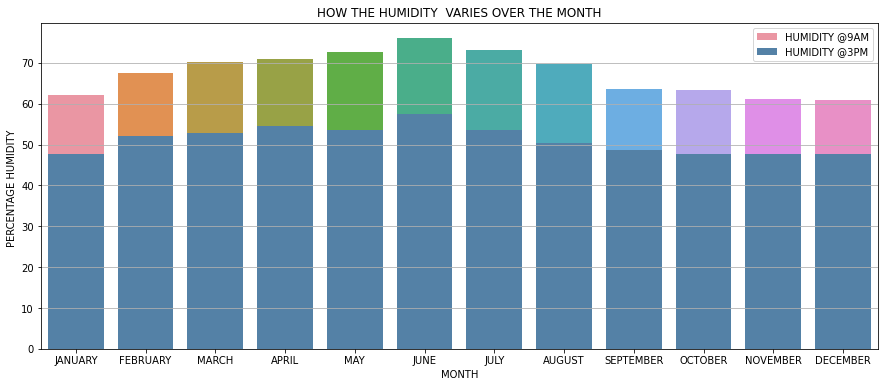

In [507]:
plt.figure(figsize=(15,6))
plt.grid(True)
plt.title("HOW THE HUMIDITY  VARIES OVER THE MONTH")
ax=sns.barplot(x=dtm['MONTH'],y=dtm['Humidity9am'],label='HUMIDITY @9AM')
sns.barplot(x=dtm['MONTH'],y=dtm['Humidity3pm'],label='HUMIDITY @3PM',color='steelblue')
plt.ylabel('PERCENTAGE HUMIDITY ')
plt.legend()
plt.show()

HUMIDITY INCREASES OVER SEASONS IE(FROM SUMMERS TO WINTER) FROM JANUARY TO JUNE AND DECRESES POST WINTERS!<BR>
HUMIDITY IS FOUND GREATER @9AM AS COMPARED TO 3PM AS WITH INCREASED TEMPERATURE THE HUMDITY TENDS TO DECREASE!<BR> 

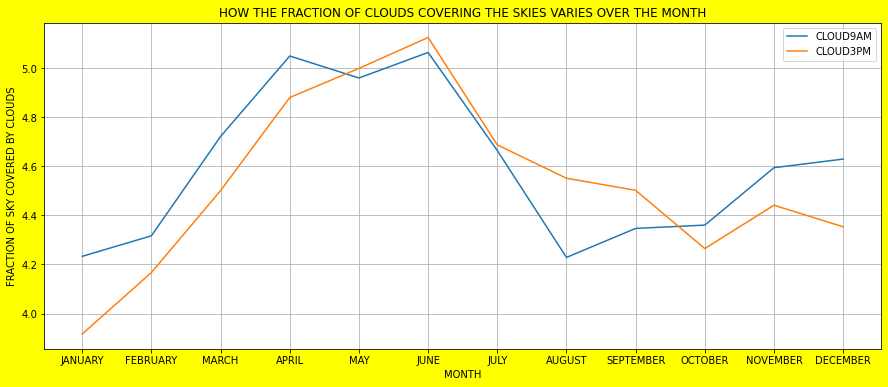

In [508]:
plt.figure(figsize=(15,6),facecolor='Yellow')
plt.grid(True)
plt.title("HOW THE FRACTION OF CLOUDS COVERING THE SKIES VARIES OVER THE MONTH")
ax=sns.lineplot(x=dtm['MONTH'],y=dtm['Cloud9am'],label='CLOUD9AM')
sns.lineplot(x=dtm['MONTH'],y=dtm['Cloud3pm'],label='CLOUD3PM',ax=ax)
plt.ylabel('FRACTION OF SKY COVERED BY CLOUDS')
plt.show()

IN THE WINTERS/AUTUMN SEASONS CLOUDS COVER A LARGE FRACTION OF SKY REACHING A VALUE AROUND 6 <BR>
FROM JANUARY TO APRIL THERE IS INCREASE IN CLOUDS FRACTION FOR BOTH THE TIMINGS AND CLOUDS @9AM HAVE A GREATER FRACTION AS COMPARED TO CLOUDS @3PM<BR>
POST APRIL CLOUDS @3PM TENDS TO COVER A LARGER FRACTION TILL OCTOBER WITH BOTH ATTAINING THE PEAK IN JUNE!!<BR>
DECRESE IN THE CLOUD FRACTIONS POST WINTERS AND AS THE SUMMERS BEGINS AGAIN CLOUDS @9AM TAKES THE LEAD 

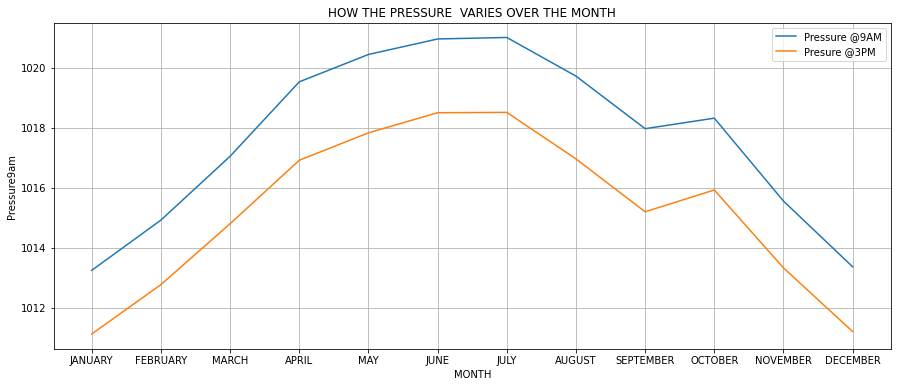

In [509]:
plt.figure(figsize=(15,6))
plt.grid(True)
plt.title("HOW THE PRESSURE  VARIES OVER THE MONTH")
ax=sns.lineplot(x=dtm['MONTH'],y=dtm['Pressure9am'],label='Pressure @9AM')
sns.lineplot(x=dtm['MONTH'],y=dtm['Pressure3pm'],label='Presure @3PM')
plt.legend()
plt.show()

PRESSURES ARE HIGHER IN MORINING AS THE TEMPERATURES ARE LOW!<BR>
A GRADUAL INCREASE CAN BE SEEN FROM JANUARY TO JUNE (FROM SUMMERS TO WINTERS)<BR>
MAXIMUM PRESSURES ARE ATTAINED IN THE WINTERS THOUGH DISTANCES ARE NOT THAT  LARGE BUT SIGNIFICANT!<BR>
POST WINTERS THERE IS DECRESE IN ATMOSPHERIC PRESSURES IN SAME MANNER AS THEY INCREASED

<B>LETS SEE HOW THE PRESSURE IS RELATED TO TEMPERATURES!

<Figure size 576x576 with 0 Axes>

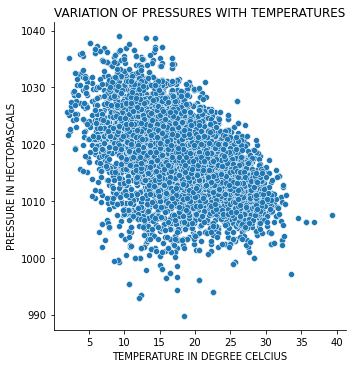

In [510]:
plt.figure(figsize=(8,8))
sns.relplot(x=dft['Temp9am'],y=dft['Pressure9am'])
plt.title("VARIATION OF PRESSURES WITH TEMPERATURES")
plt.xlabel("TEMPERATURE IN DEGREE CELCIUS")
plt.ylabel("PRESSURE IN HECTOPASCALS")
plt.show()

ITS CLEARLY OBSERVED THAT WITH INCREASE IN TEMPERATURES THE PRESSURES TENDS TO DECREASE <BR>
STRONG RELATIONSHIP CAN BE OBSERVED BETWEEN BOTH THE FEATURES!<BR>


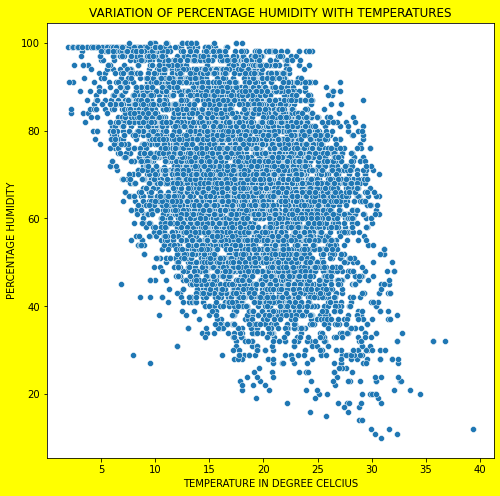

In [511]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.scatterplot(x=dft['Temp9am'],y=dft['Humidity9am'])
plt.title("VARIATION OF PERCENTAGE HUMIDITY WITH TEMPERATURES")
plt.xlabel("TEMPERATURE IN DEGREE CELCIUS")
plt.ylabel("PERCENTAGE HUMIDITY")
plt.show()

WITH INCREASE IN TEMPERATURES A DROP IN PERCENTAGE HUMIDITY CAN BE SEEN OVER THE RANGING TEMPERATURES!<BR>
A CONSIDERABLE RELATIONSHIP BETWEEN BOTH THE FEATURES CAN BE OBSERVED!

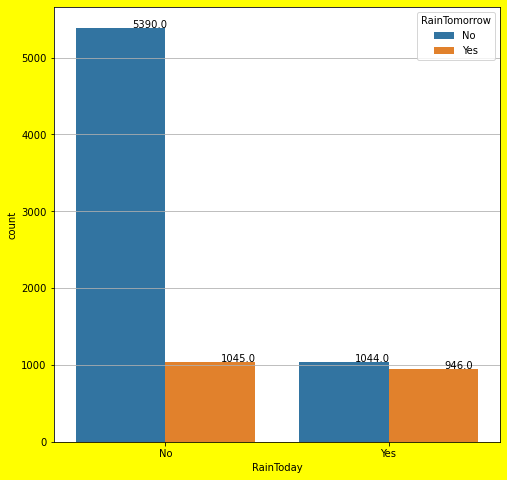

In [512]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
ax=sns.countplot(x=dft['RainToday'],hue=dft['RainTomorrow'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()


THERE ARE SIGNIFICANT AMOUNTS OF INSTANCES WHICH PROVES THAT THE PROBABILITY OF RAINING TOMORROW IF IT HAVE RAINED TODAY IS CONSIDERABLE<BR>
FOR 946 INSTANCES IT HAVE RAINED THE CONSECUTIVE DAY WHICH IS A GOOD COUNT!
    

<B> LETS CHECK HOW DIFFERENT PARAMETERS VARY IF ITS ABOUT TO RAIN TODAY

<B>TEMPERATURE

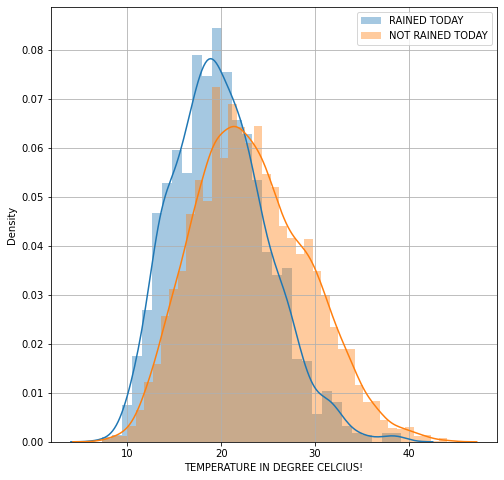

In [513]:
fig=plt.figure(figsize=(8,8))
plt.grid(True)
sns.distplot(x=dft.loc[dft['RainToday']=='Yes','Temp3pm'],label='RAINED TODAY')
sns.distplot(x=dft.loc[dft['RainToday']=='No','Temp3pm'],label='NOT RAINED TODAY')
plt.xlabel("TEMPERATURE IN DEGREE CELCIUS!")
plt.legend()
plt.show()

WHEN ITS ABOUT TO RAIN LOWER TEMPERATURES ARE RECORDED (<20) AS COMPARED TO THE DAYS WHEN IT DOES NOT RAIN!
SO REDCUED TEMPERATURES AIDS AND INCREASES THE PROBABILITY OF RAIN

<B>HUMIDITY

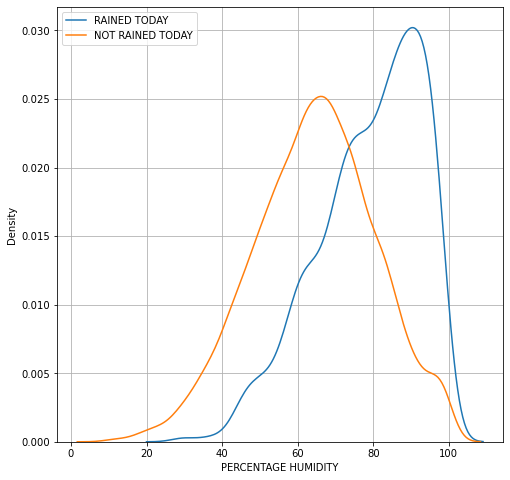

In [514]:
fig=plt.figure(figsize=(8,8))
plt.grid(True)
sns.kdeplot(x=dft.loc[dft['RainToday']=='Yes','Humidity9am'],label='RAINED TODAY')
sns.kdeplot(x=dft.loc[dft['RainToday']=='No','Humidity9am'],label='NOT RAINED TODAY')
plt.xlabel("PERCENTAGE HUMIDITY")
plt.legend()
plt.show()

HIGHER VALUES OF HUMIDITY ARE RECORDED WHEN IT RAINS AS COMPARED TO WHEN IT DOESNT!<BR>
A PROPER SHIFT TOWRADS THE RIGHT CAN BE SEEN IN THE PLOT!<BR>

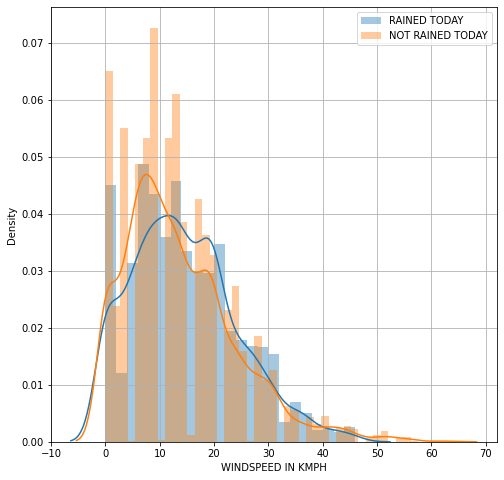

In [515]:
fig=plt.figure(figsize=(8,8))
plt.grid(True)
sns.distplot(x=dft.loc[dft['RainToday']=='Yes','WindSpeed9am'],label='RAINED TODAY')
sns.distplot(x=dft.loc[dft['RainToday']=='No','WindSpeed9am'],label='NOT RAINED TODAY')
plt.xlabel("WINDSPEED IN KMPH")
plt.legend()
plt.show()

In [516]:
print(f"MEAN WIND SPEEDS @9 AM WHEN IT DID NOT RAIN IS {dft.groupby('RainToday').mean()['WindSpeed9am'][0]}")
print(f"MEAN WIND SPEEDS @9 AM WHEN IT DID  RAIN IS {dft.groupby('RainToday').mean()['WindSpeed9am'][1]}")

MEAN WIND SPEEDS @9 AM WHEN IT DID NOT RAIN IS 13.65143500622978
MEAN WIND SPEEDS @9 AM WHEN IT DID  RAIN IS 14.499339863063597


MEAN WINDS SPEEDS TENDS TO SHIFT TO THE RIGHT WHEN ITS ABOUT TO RAIN<BR>
HIGHER WIND SPEEDS AND LOWER TEMPERATURES AIDS THE RAIN

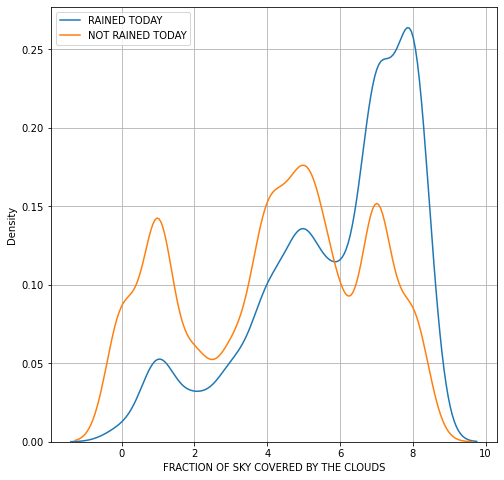

In [517]:
fig=plt.figure(figsize=(8,8))
plt.grid(True)
sns.kdeplot(x=dft.loc[dft['RainToday']=='Yes','Cloud9am'],label='RAINED TODAY')
sns.kdeplot(x=dft.loc[dft['RainToday']=='No','Cloud9am'],label='NOT RAINED TODAY')
plt.xlabel("FRACTION OF SKY COVERED BY THE CLOUDS")
plt.legend()
plt.show()

PEAK DENSITIES SHIFT TO THE EXTREME RIGHT WHEN ITS ABOUT TO RAIN <BR>


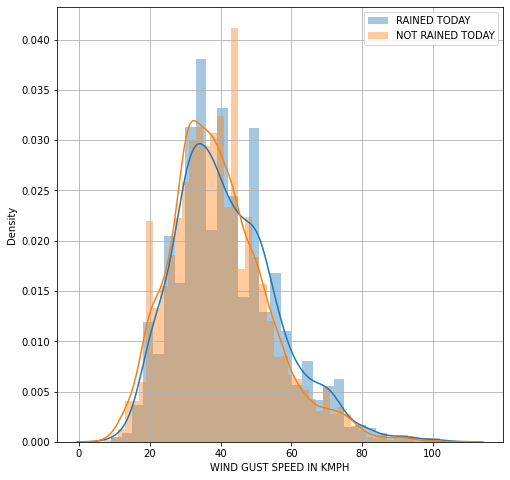

In [518]:
fig=plt.figure(figsize=(8,8))
plt.grid(True)
sns.distplot(x=dft.loc[dft['RainToday']=='Yes','WindGustSpeed'],label='RAINED TODAY')
sns.distplot(x=dft.loc[dft['RainToday']=='No','WindGustSpeed'],label='NOT RAINED TODAY')
plt.xlabel("WIND GUST SPEED IN KMPH")
plt.legend()
plt.show()

<B>WIND DIRECTIONS!

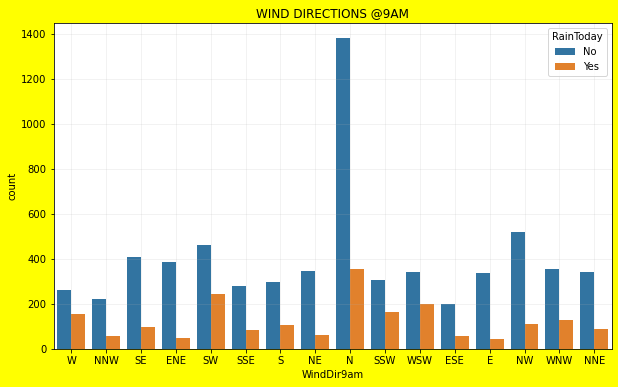

In [519]:
plt.figure(figsize=(10,6),facecolor='Yellow')
sns.countplot(x=dft['WindDir9am'],hue=dft['RainToday'])
plt.grid(True,alpha=0.2)
plt.title("WIND DIRECTIONS @9AM")
plt.show()

THE MAXIMUM COUNTS ARE FOR THE WINDS FLOWING IN THE NORTH DIRECTION FOR BOTH WHEN IT RAINED AND WHEN IT DINT!<BR>


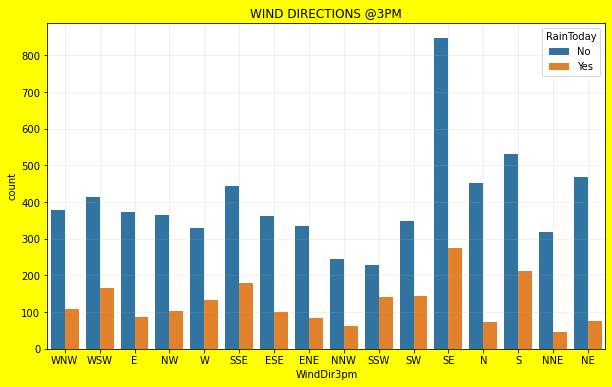

In [520]:
plt.figure(figsize=(10,6),facecolor='Yellow')
sns.countplot(x=dft['WindDir3pm'],hue=dft['RainToday'])
plt.grid(True,alpha=0.2)
plt.title("WIND DIRECTIONS @3PM")
plt.show()

WINDS TENDS TO FLOW SOUTH EAST IN MOST CASES IN THE AFTERNOON AROUND 3PM

<B>LETS CHECK THE WIND DIRECTION ACROSS THE MONTH!

In [521]:
dfa=dft.copy()

In [522]:
dfa['MONTH']=dfa['MONTH'].map({1:'JANUARY',2:'FEBRUARY',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUGUST',9:'SEPTEMBER',10:'OCTOBER',11:'NOVEMBER',12:'DECEMBER'})

In [523]:
wind=pd.crosstab(dfa['MONTH'],[dfa['WindDir3pm']]).reset_index().set_index('MONTH')

In [524]:
lis=wind.columns.to_list()

In [525]:
len(lis)

16

<Figure size 720x720 with 0 Axes>

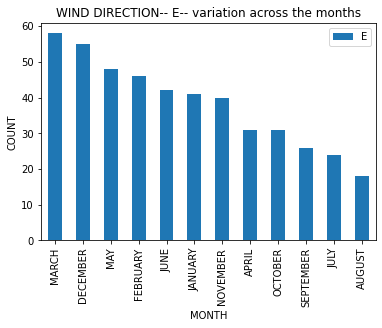

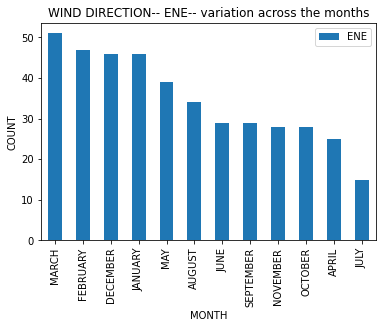

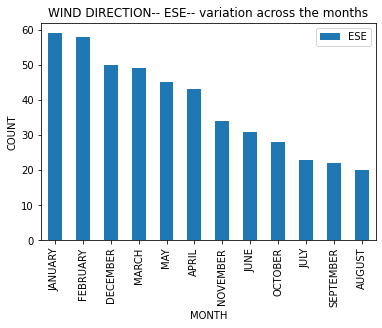

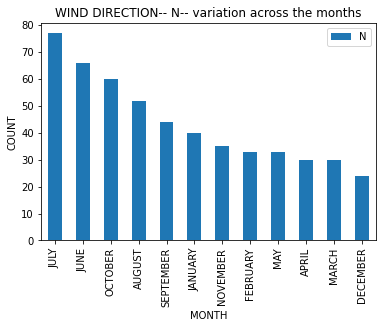

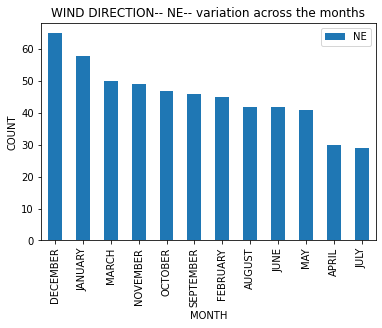

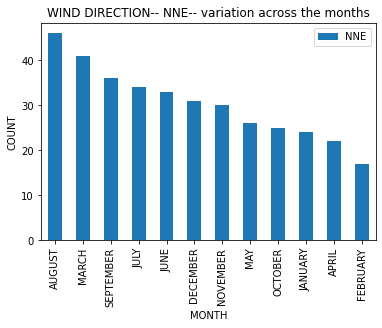

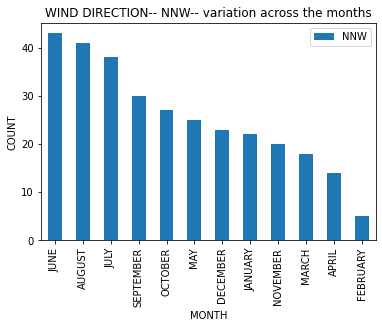

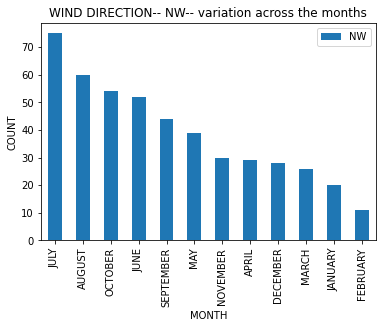

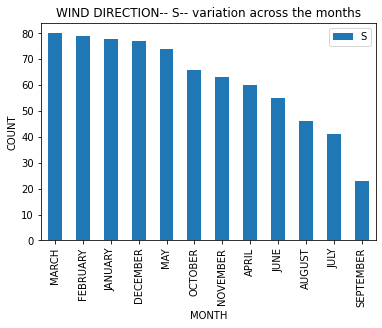

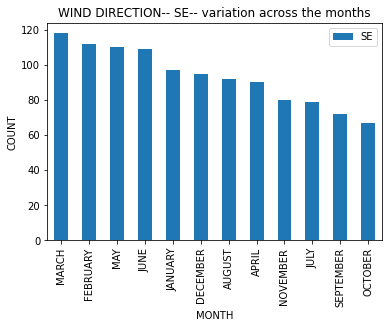

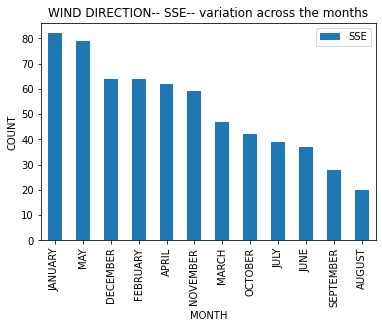

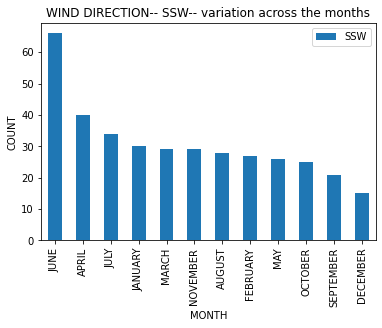

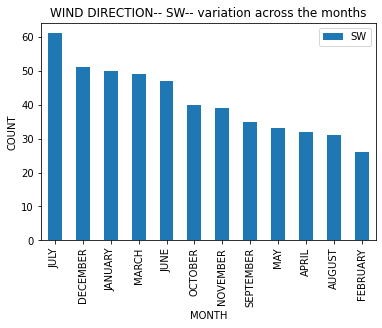

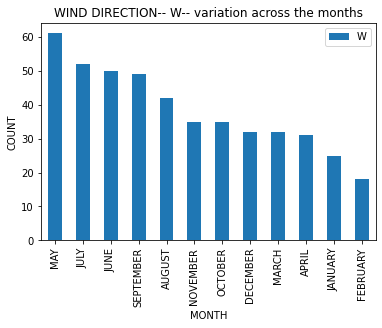

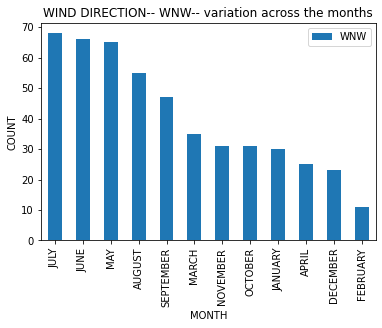

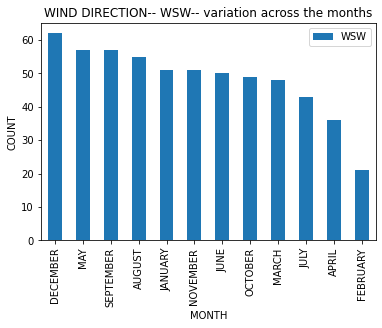

In [526]:
plt.figure(figsize=(10,10))
n=1
for i in lis:
    if(n<17):
        wind.sort_values(by=i,ascending=False).plot(kind='bar',y=i)
        plt.title(f"WIND DIRECTION-- {i}-- variation across the months")
        plt.ylabel("COUNT")
        plt.show()
    n+=1
plt.show()


DIFFERENT WIND DIRECTIONS ACROSS DIFFERENT MONTHS CAN BE AMALYSED BY THE ABOVE PLOTS!!<BR>


ENCODING THE CATEGORICAL COLUMNS!!
------

In [527]:
cat_col

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

<B>ENCODING DATE USING ORDINAL ENCODER

In [528]:
from sklearn.preprocessing import OrdinalEncoder

In [529]:
#ARRANGING THE DATE IN THE SEQUENTIAL ORDER!

In [530]:
date_order=sorted(dft['Date'].unique())

In [531]:
date_order

['2008-12-01',
 '2008-12-02',
 '2008-12-03',
 '2008-12-04',
 '2008-12-05',
 '2008-12-06',
 '2008-12-07',
 '2008-12-08',
 '2008-12-09',
 '2008-12-10',
 '2008-12-11',
 '2008-12-12',
 '2008-12-13',
 '2008-12-14',
 '2008-12-15',
 '2008-12-16',
 '2008-12-17',
 '2008-12-18',
 '2008-12-19',
 '2008-12-20',
 '2008-12-21',
 '2008-12-22',
 '2008-12-23',
 '2008-12-24',
 '2008-12-25',
 '2008-12-26',
 '2008-12-27',
 '2008-12-28',
 '2008-12-29',
 '2008-12-30',
 '2008-12-31',
 '2009-01-01',
 '2009-01-02',
 '2009-01-03',
 '2009-01-04',
 '2009-01-05',
 '2009-01-06',
 '2009-01-07',
 '2009-01-08',
 '2009-01-09',
 '2009-01-10',
 '2009-01-11',
 '2009-01-12',
 '2009-01-13',
 '2009-01-14',
 '2009-01-15',
 '2009-01-16',
 '2009-01-17',
 '2009-01-18',
 '2009-01-19',
 '2009-01-20',
 '2009-01-21',
 '2009-01-22',
 '2009-01-23',
 '2009-01-24',
 '2009-01-25',
 '2009-01-26',
 '2009-01-27',
 '2009-01-28',
 '2009-01-29',
 '2009-01-30',
 '2009-01-31',
 '2009-02-01',
 '2009-02-02',
 '2009-02-03',
 '2009-02-04',
 '2009-02-

In [532]:
oe=OrdinalEncoder(categories=[date_order])

In [533]:
dft['Date']=oe.fit_transform(dft['Date'].values.reshape(-1,1))

<B> ENCODING LOCATION, WindGustDir,WindDir23pm,WindDir9am

In [534]:
import category_encoders as ce

In [535]:
bb=['Location','WindGustDir','WindDir3pm','WindDir9am']

In [536]:
ben=ce.BinaryEncoder(cols=bb)

In [537]:
dft=ben.fit_transform(dft)

<B> ENCODING RAINTODAY,RAINTOMORROW!!

In [538]:
kl=['RainToday','RainTomorrow']

In [539]:
for i in kl:
    ma={value:key for key,value in enumerate(dft[i].value_counts().index)}
    dft[i]=dft[i].map(ma)

<B>ENCODING COMPLETE!

In [540]:
dft.head()

,Date,YEAR,MONTH,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Rainfall,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,2008,12,0,0,0,1,13.4,22.9,0.6,...,71.0,22.0,1007.7,1007.1,8.000000,3.957676,16.9,21.8,0,0
1,1.0,2008,12,0,0,0,1,7.4,25.1,0.0,...,44.0,25.0,1010.6,1007.8,4.012362,3.957676,17.2,24.3,0,0
2,2.0,2008,12,0,0,0,1,12.9,25.7,0.0,...,38.0,30.0,1007.6,1008.7,4.012362,2.000000,21.0,23.2,0,0
3,3.0,2008,12,0,0,0,1,9.2,28.0,0.0,...,45.0,16.0,1017.6,1012.8,4.012362,3.957676,18.1,26.5,0,0
4,4.0,2008,12,0,0,0,1,17.5,32.3,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


CHECKING THE COORELATION AMONG THE FEATRES!!
--------------

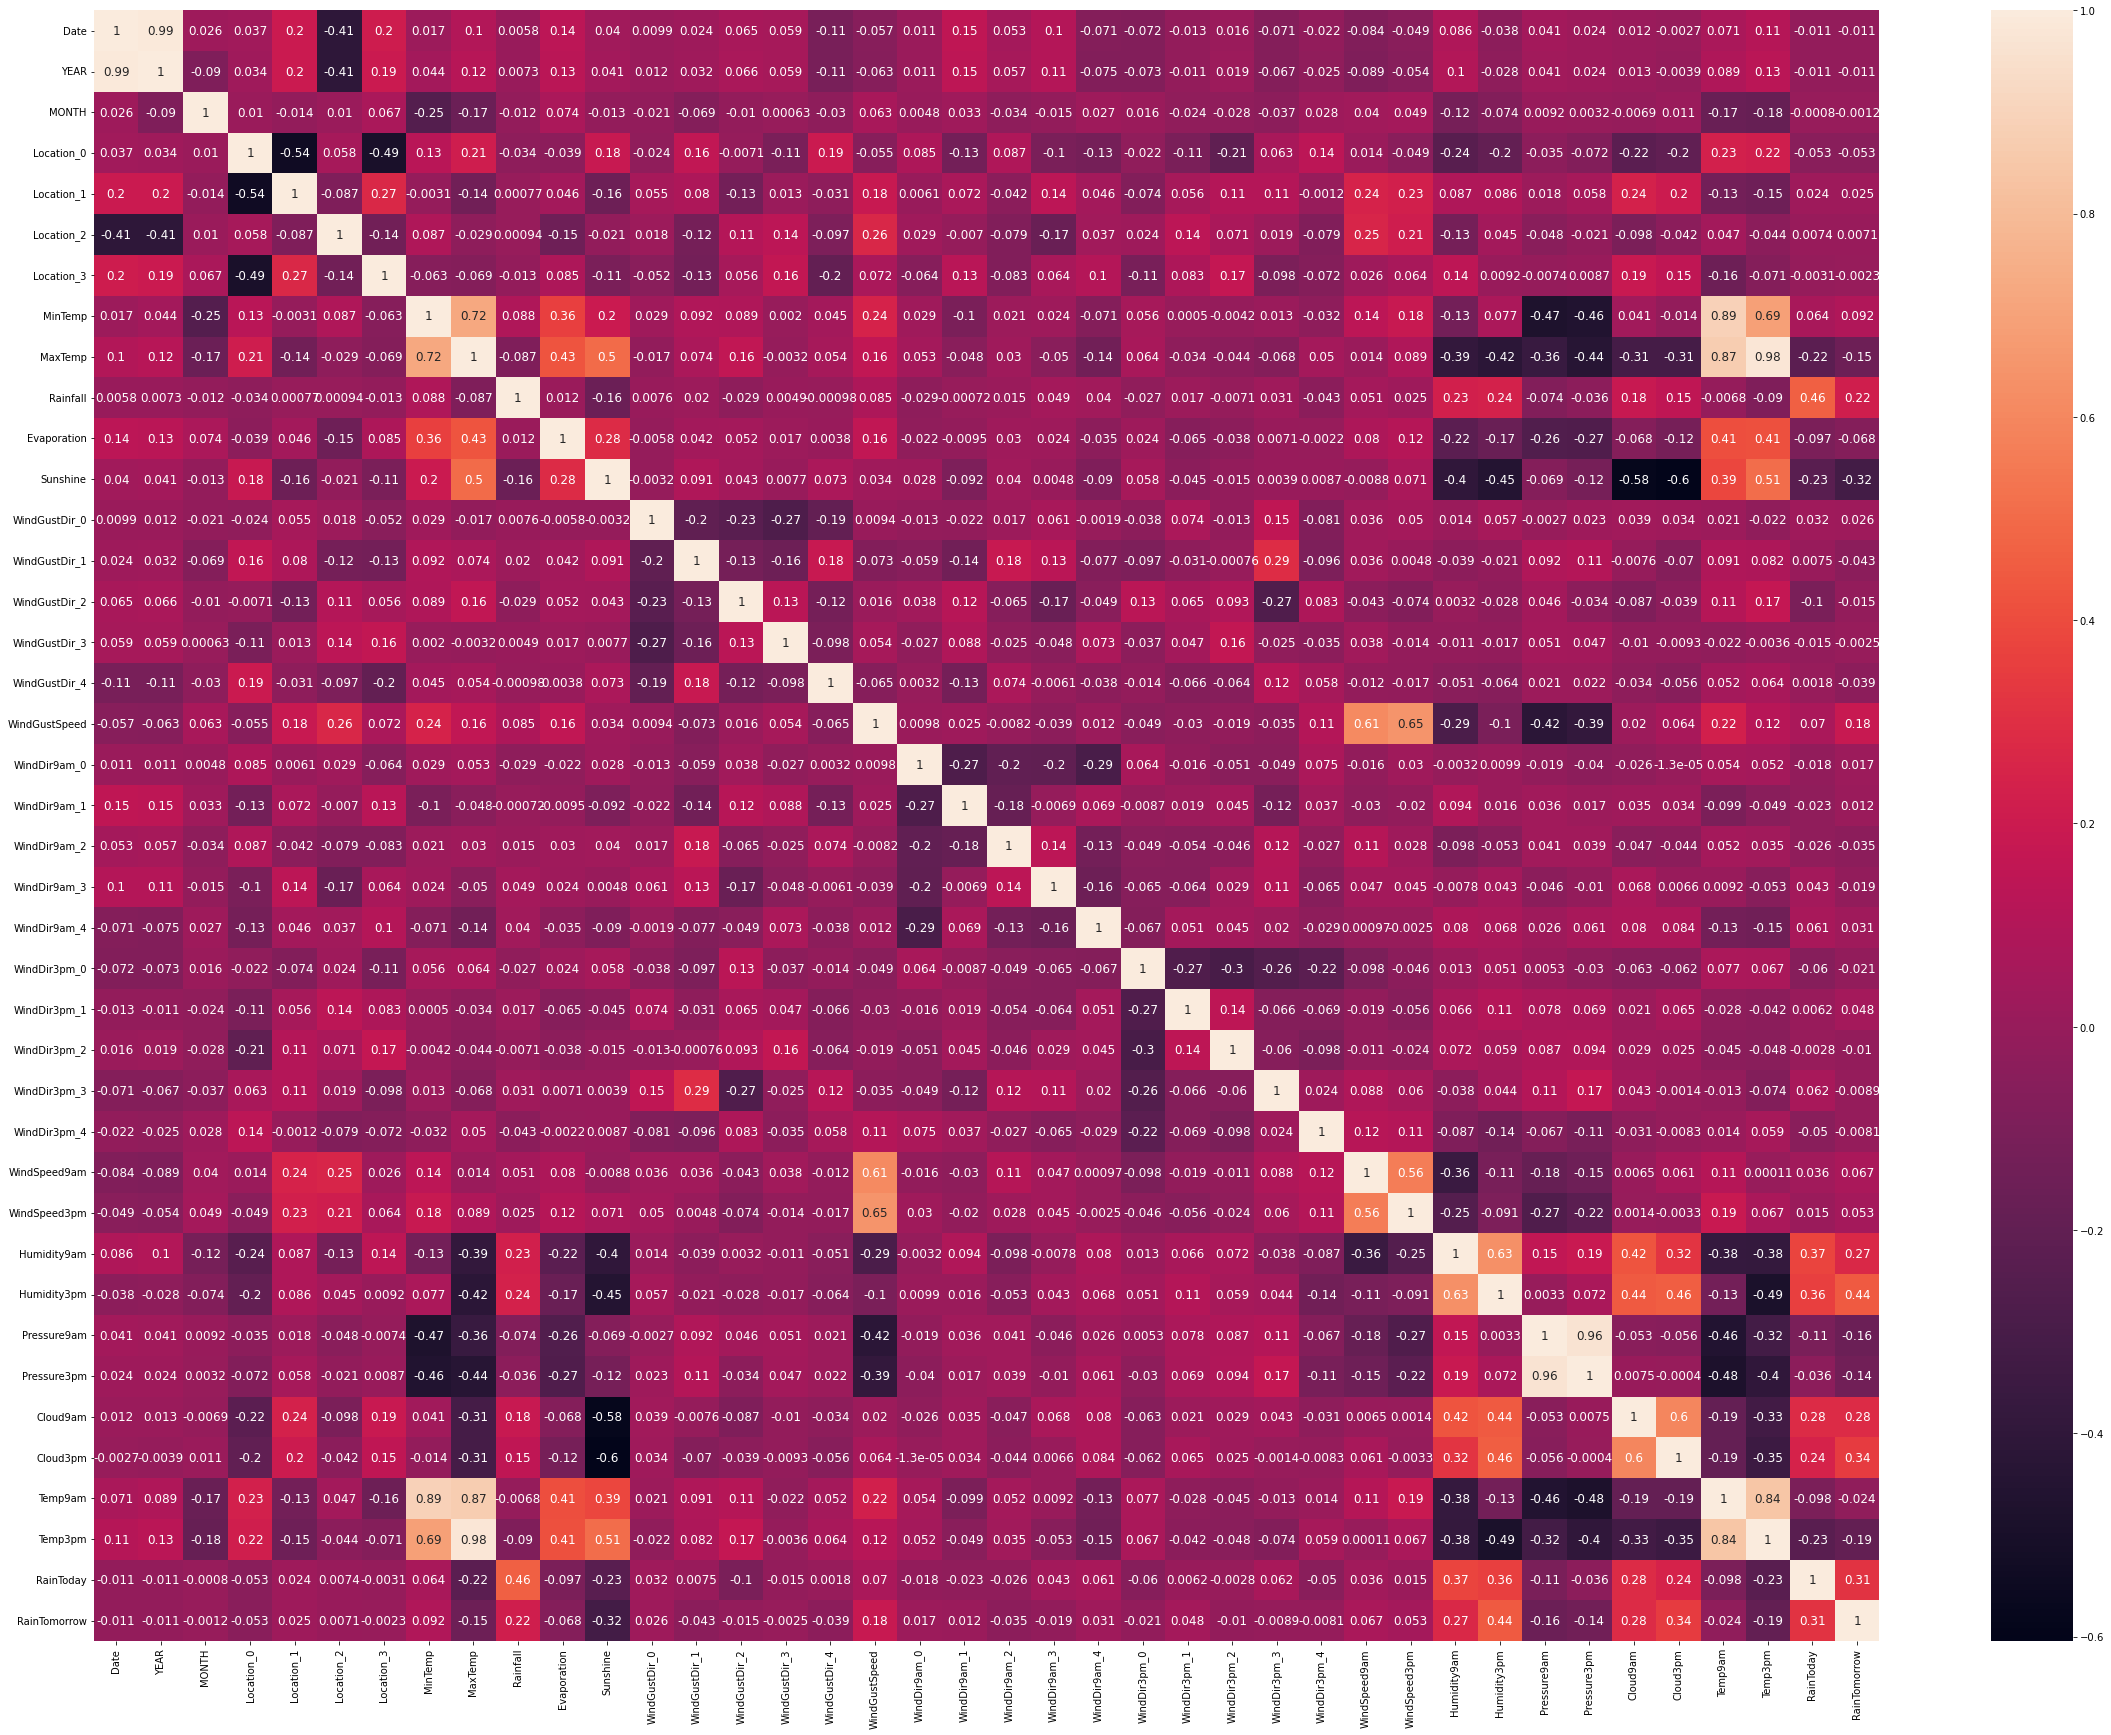

In [541]:
plt.figure(figsize=(40,30))
sns.heatmap(dft.corr(),annot=True,annot_kws={'size':12})
plt.show()

IT CAN BE OBSERVED THAT THE DERIVED COLUMNS LIKE MONTH AND YEAR TENDS TO HAVE BETTER CORRELATION WITH OTHER FEATURES AND LABEL!!

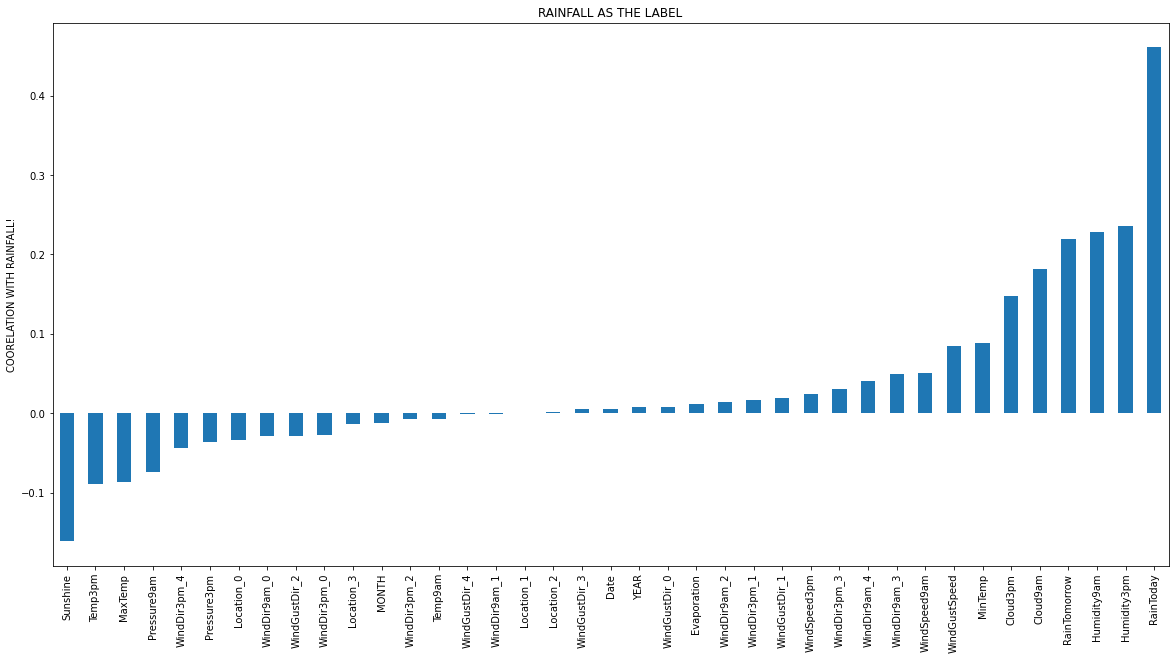

In [542]:
plt.figure(figsize=(20,10))
ax=dft.corr()['Rainfall'].sort_values().drop(['Rainfall']).plot(kind='bar')
plt.ylabel("COORELATION WITH RAINFALL!")
plt.title("RAINFALL AS THE LABEL")
plt.show()


HUMIDITY ,CLOUDS AND TEMPERATURE TENDS TO HAVE POSITIVE CORRELATION WITH THE RAINFALL!<BR>
SUNSHINE HAVE BETTER NEGATIVE COORELATION WITH THE RAINFALL<BR>
YEAR AND MONTHS HAVE BETTER CORRELATION WITH THE RAINFALL (IN MM) AS COMPARED TO THE DATE 

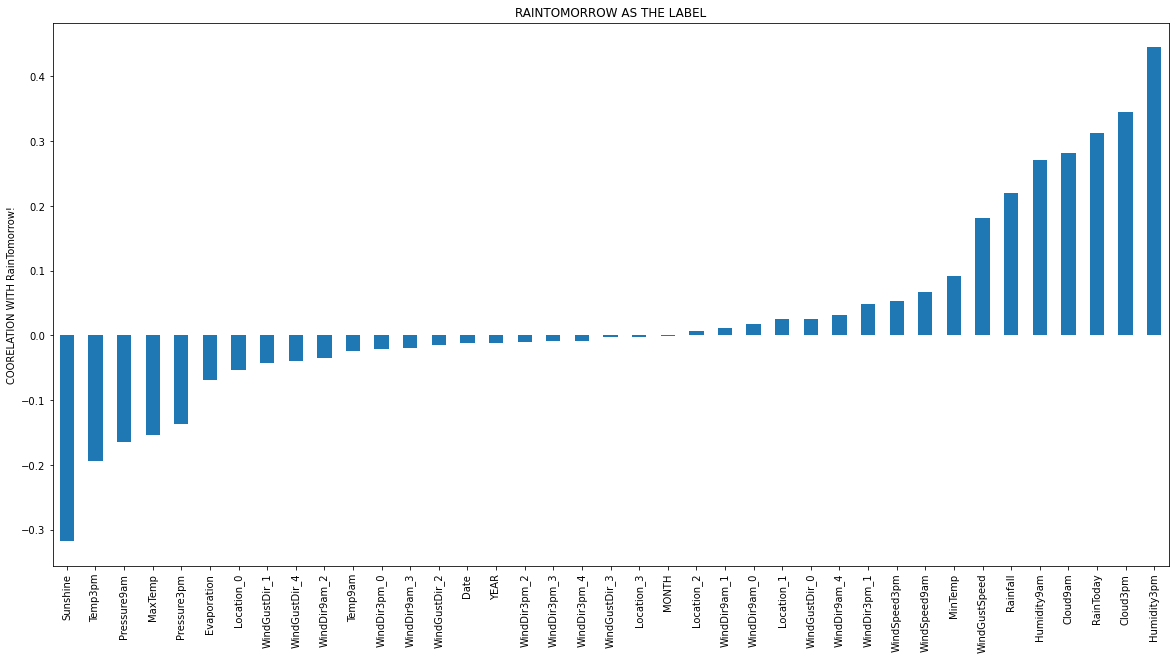

In [543]:
plt.figure(figsize=(20,10))
ax=dft.corr()['RainTomorrow'].sort_values().drop(['RainTomorrow']).plot(kind='bar')
plt.ylabel("COORELATION WITH RainTomorrow!")
plt.title("RAINTOMORROW AS THE LABEL")
plt.show()

Similar trends can be seen with the label RainTomorrow as were with RainToday!<br>


CHECKING THE SKEWNESS AMONG THE FEATURES!!
----------------

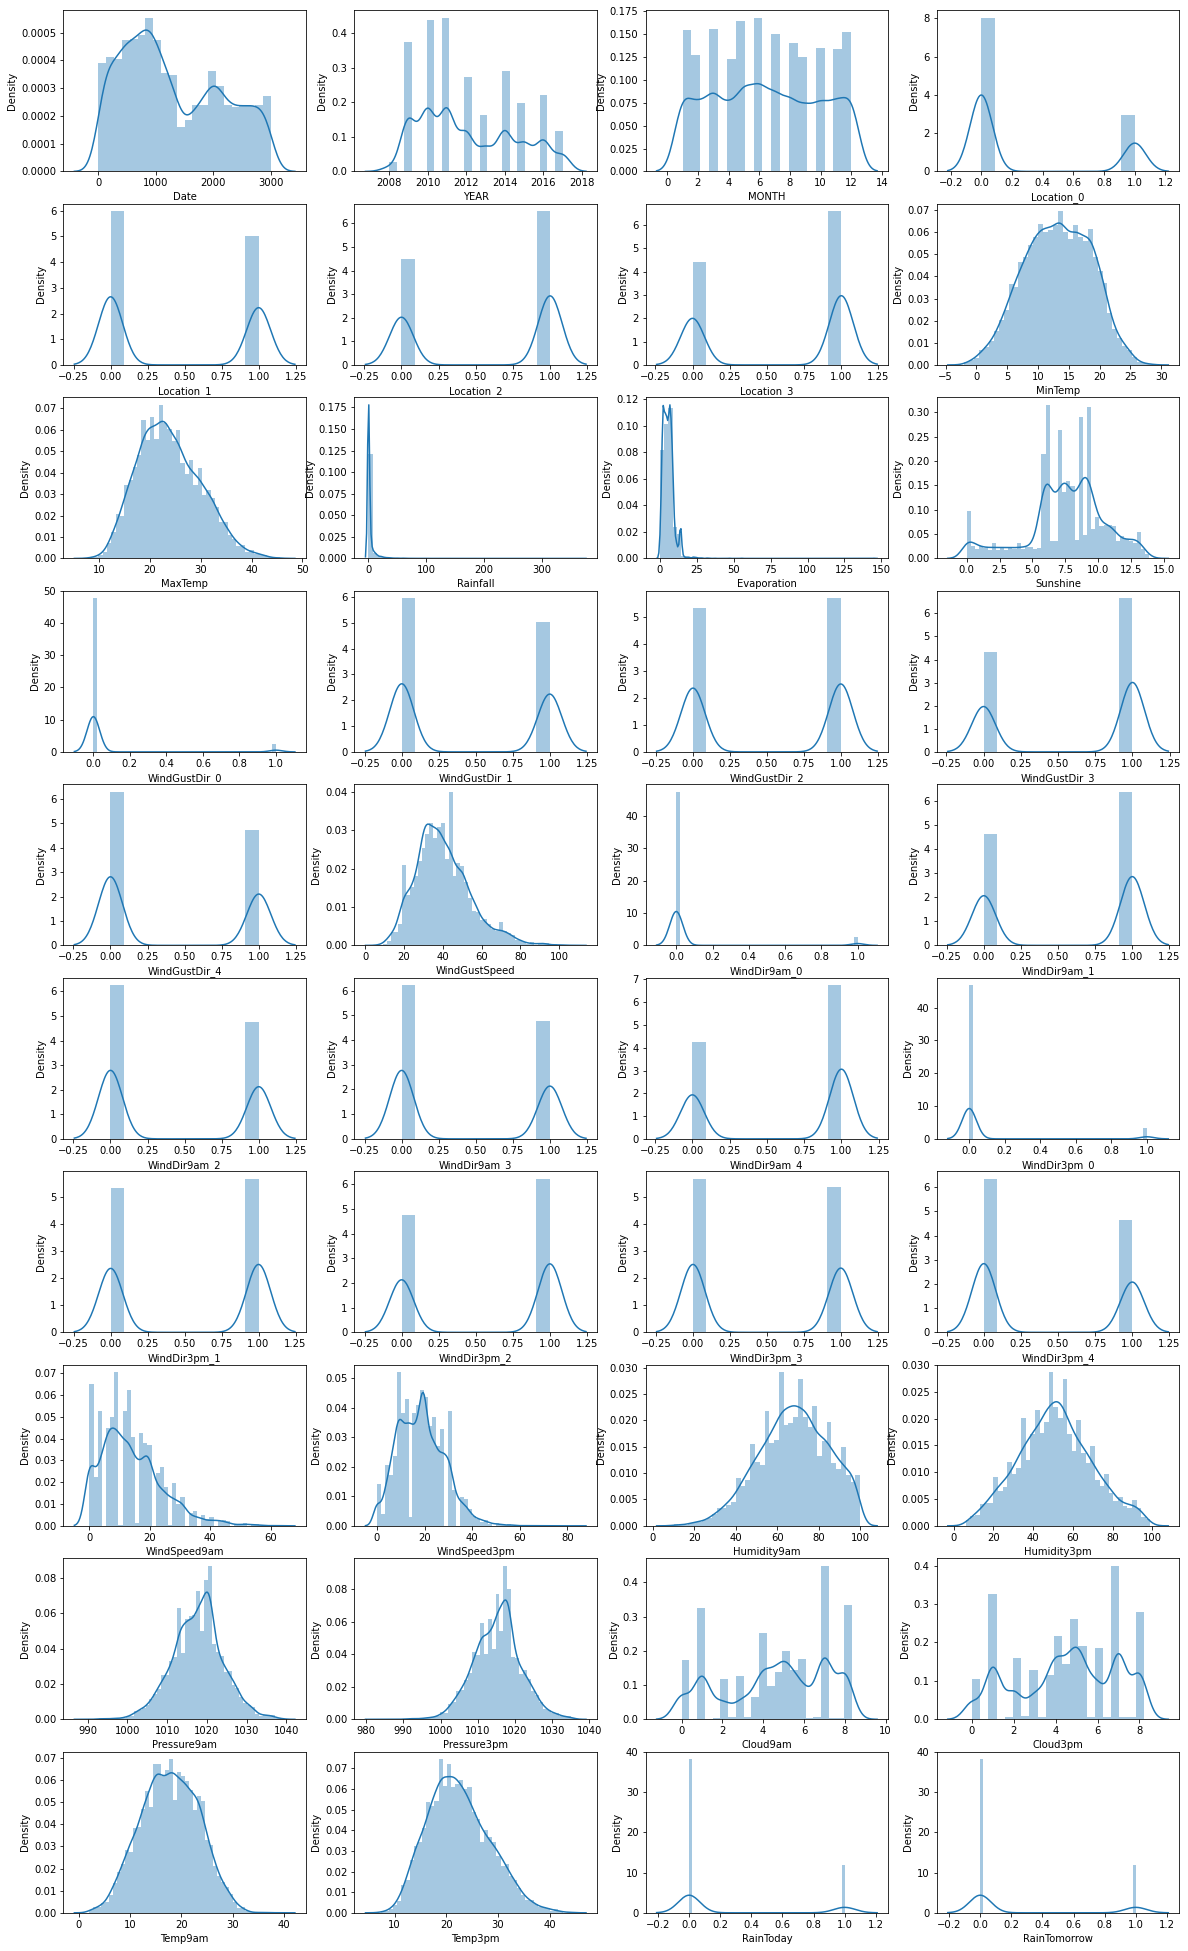

In [544]:
plt.figure(figsize=(20,35))
n=1
for i in dft:
    if(n<41):
        ax=plt.subplot(10,4,n)
        sns.distplot(x=dft[i])
        plt.xlabel(i)
    n+=1
plt.show()    
    


RAINFALL,EVAPORATION,WINDGUSTDIR ARE EXPERIENCING HIGH SKEWNESS<BR>
SKEWED TO THE RIGHT!<BR>
WINDSPEED9AM,WINDSPEED3PM CAN BE SEEN HAVING CONSIDERABLE BUT LOW AMOUNT OF SKEWNESS!!<BR>
HUMIDITY9AM CAN BE SEEN SKEWED TO THE LEFT BUT IN LIMITED RANGES!<BR>

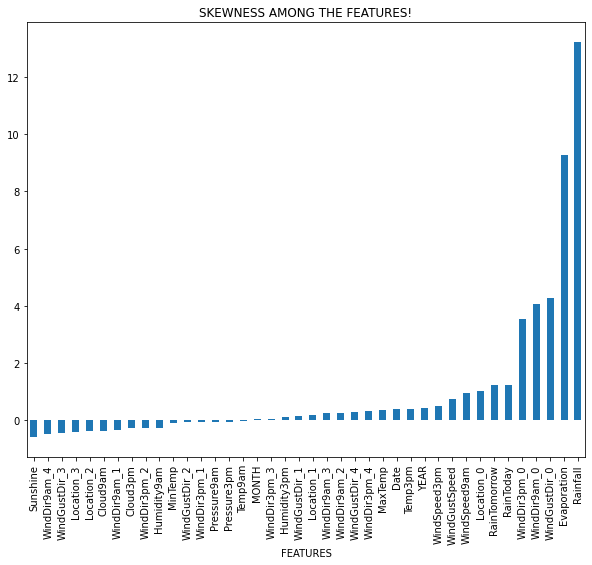

In [545]:
plt.figure(figsize=(10,8))
dft.skew().sort_values().plot(kind='bar')
plt.title("SKEWNESS AMONG THE FEATURES!")
plt.xlabel("FEATURES")
plt.show()

RAINFALL EVAPORATION ARE AMONG THE HIGHLY SKEWED FEATURES AND MUST BE TREATED BEFORE PROCEEDING TO MODELLING!

STANDARDISATION OF THE FEATURES USING POWER TRANSFOMER!!
------------------

In [546]:
from sklearn.preprocessing import PowerTransformer

In [547]:
dfl=dft.copy()

In [312]:
pt=PowerTransformer()

In [313]:
dft=pd.DataFrame(pt.fit_transform(dft),columns=dft.columns)

In [314]:

dft.skew().sort_values()

WindDir9am_4    -0.463304
WindGustDir_3   -0.429084
Location_3      -0.398742
Location_2      -0.372159
WindDir9am_1    -0.326950
Cloud9am        -0.300955
WindDir3pm_2    -0.265622
Cloud3pm        -0.240567
Date            -0.166431
MONTH           -0.155749
Sunshine        -0.140985
MinTemp         -0.106017
WindSpeed9am    -0.079991
Humidity9am     -0.067421
WindGustDir_2   -0.062950
WindDir3pm_1    -0.060097
Temp9am         -0.050917
Humidity3pm     -0.038907
WindSpeed3pm    -0.037361
MaxTemp         -0.011151
Temp3pm         -0.010237
YEAR             0.000000
Pressure3pm      0.002409
WindGustSpeed    0.002584
Pressure9am      0.002960
Evaporation      0.011759
WindDir3pm_3     0.055343
WindGustDir_1    0.164140
Location_1       0.174219
WindDir9am_3     0.261237
WindDir9am_2     0.273428
WindGustDir_4    0.291036
WindDir3pm_4     0.313633
Rainfall         0.904759
Location_0       1.034790
RainTomorrow     1.241588
RainToday        1.242362
WindDir3pm_0     3.544098
WindDir9am_0

SKEWNESS CONTROLLED SUCCESSFULLY!!
----------------

CHECKING FOR OUTLIERS!
---------------

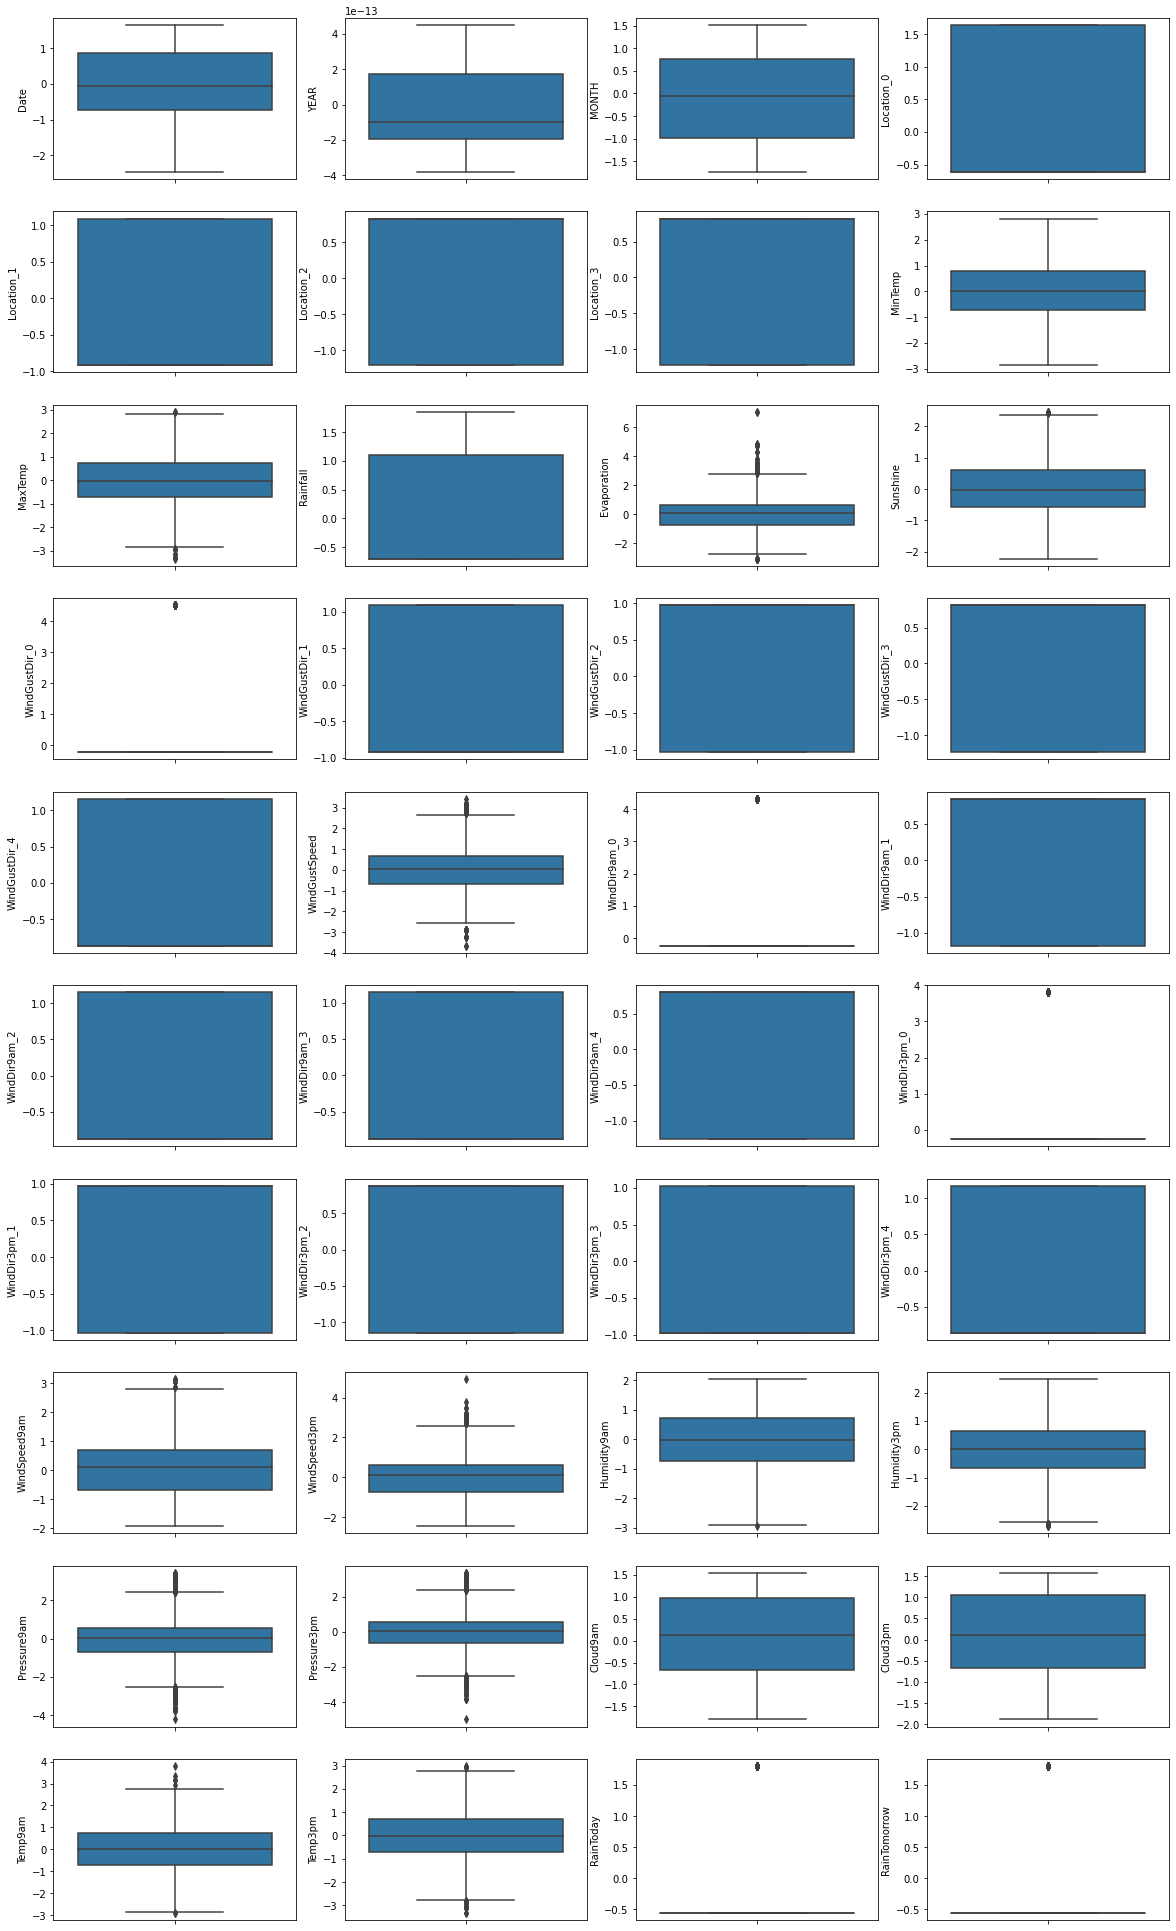

In [315]:
plt.figure(figsize=(20,35))
n=1
for i in dft:
    if(n<41):
        ax=plt.subplot(10,4,n)
        sns.boxplot(y=dft[i])
        plt.ylabel(i)
    n+=1
plt.show()    

EVAPORATION<BR>
WINDGUSTSPEED<BR>
PRESSURE9AM<BR>
PRESSURE3PM<BR>
TEMP3PM<BR>
TEMP9AM<BR>
CAN BE SEEN HAVING CONSIDERABLE AMOUNT OF OUTLIERS AMONG ALL!!<BR>
AND MUST BE HANDLED SUITABLY

In [316]:
dfo=dft.copy()

In [317]:
print(f'SHAPE BEFORE OUTLIER REMOVAL IS {dfo.shape}')

SHAPE BEFORE OUTLIER REMOVAL IS (8425, 40)


In [318]:
from datasist.structdata import detect_outliers

In [319]:
lip=dfo.columns.to_list()

In [320]:
cont_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [321]:
outlier=detect_outliers(dfo[cont_col],0,dfo[cont_col].columns)

In [322]:
dfo.drop(outlier,inplace=True)

In [323]:
dfo.shape

(8053, 40)

In [324]:
print(f'SHAPE AFTER OUTLIER REMOVAL IS {dfo.shape}')

SHAPE AFTER OUTLIER REMOVAL IS (8053, 40)


In [325]:
print(f'LOSS AFTER OUTLIER REMOVAL IS {round((8425-8053)/8425*100,2)}')

LOSS AFTER OUTLIER REMOVAL IS 4.42


SINCE THE LOSS IS LESS THAN 5% WE CAN CONSIDER THIS DATSET WITH REMOVED OUTLIERS!!

In [326]:
dft=dfo.copy()

In [327]:
dft.shape

(8053, 40)

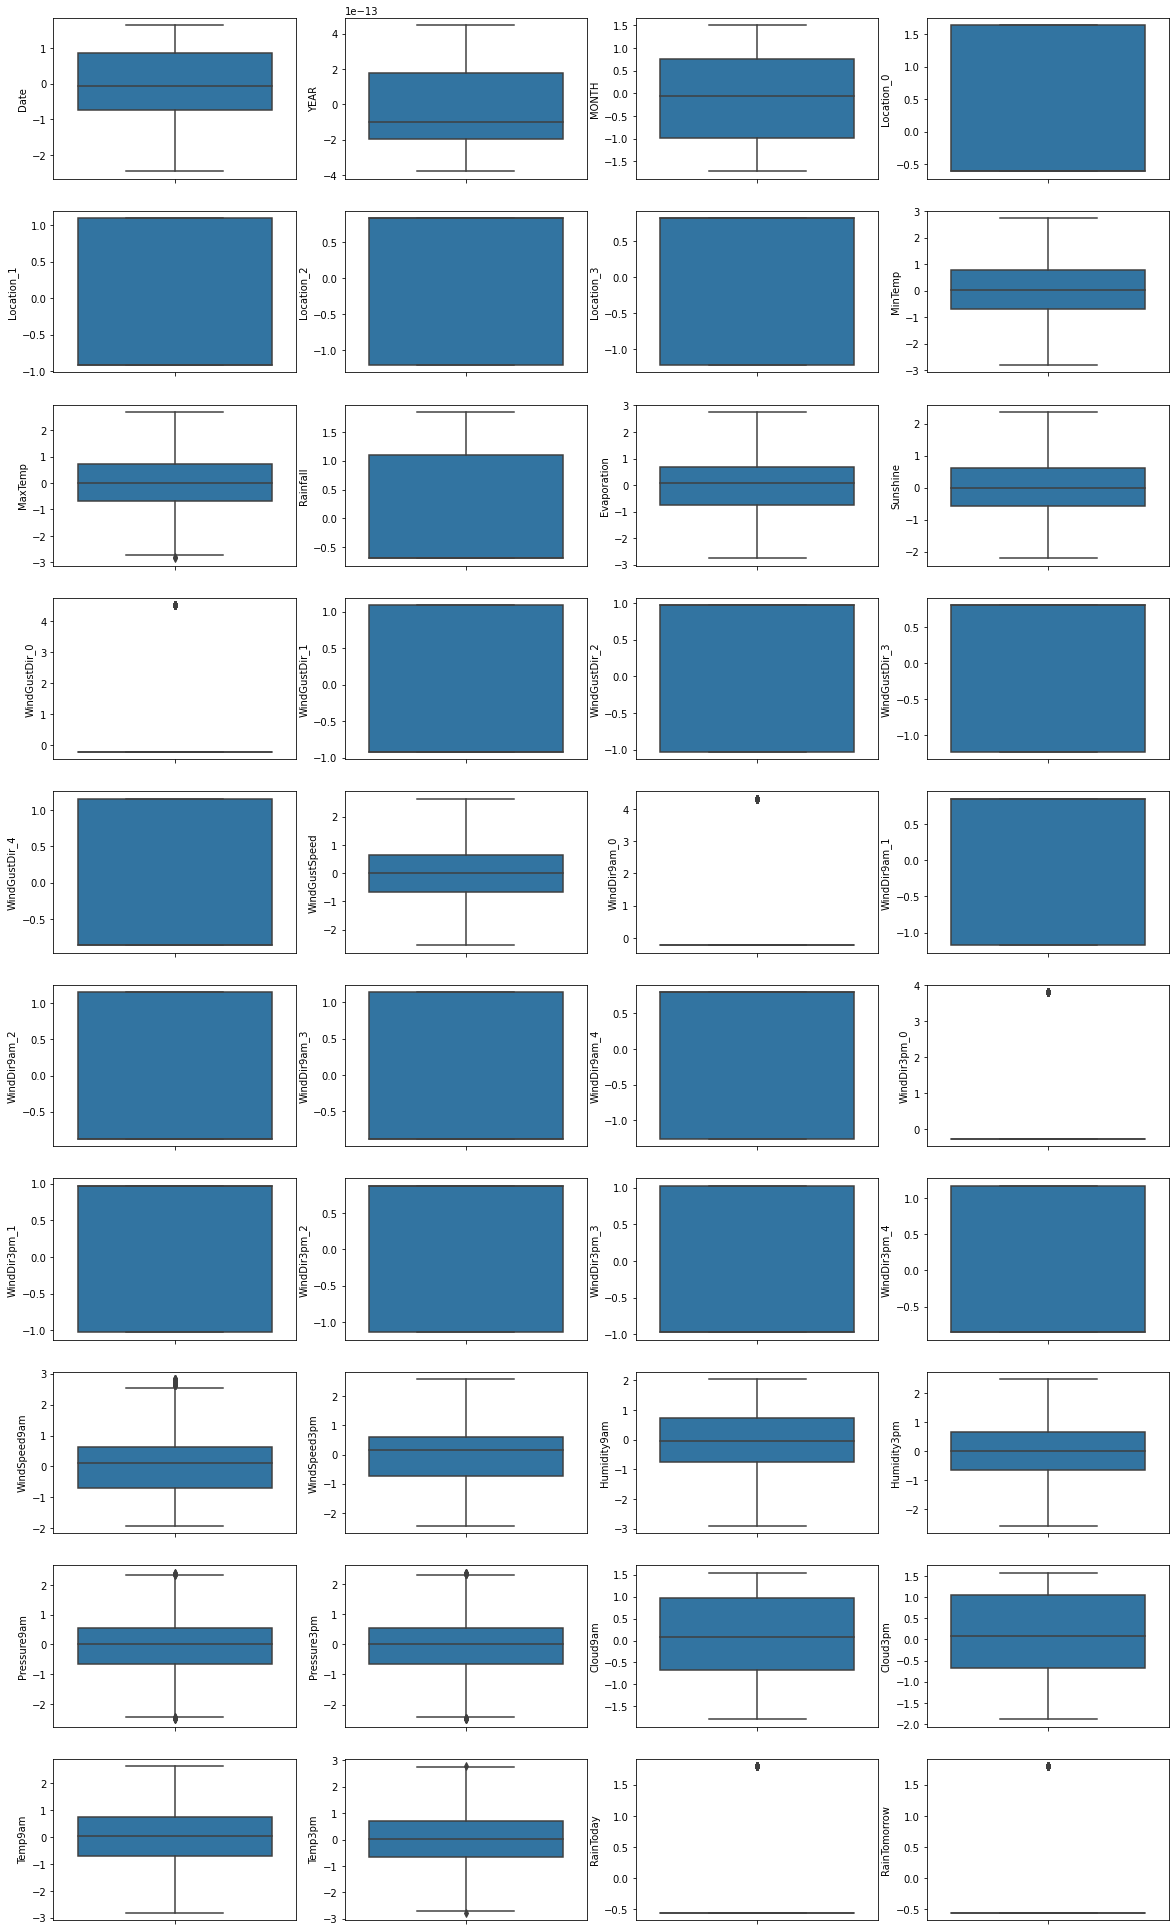

In [328]:
plt.figure(figsize=(20,35))
n=1
for i in dft:
    if(n<41):
        ax=plt.subplot(10,4,n)
        sns.boxplot(y=dft[i])
        plt.ylabel(i)
    n+=1
plt.show()  

AS WE CAN SEE THE THE OUTLIERS ARE CONTROLLED SUCESSFULLY!!

CHECKING FOR MULTICOLIINEARITY (ZSCORES) WITH RAINFALL AS THE LABEL!!
-------------

In [329]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<b>SPLITTING DATASET IN FETURES AND LABELS!

In [330]:
x_scaled=dft.drop(['Rainfall'],axis=1)

In [331]:
y=dft['Rainfall']

In [332]:
vif=pd.DataFrame()

In [333]:
vif['FEATURES']=x_scaled.columns

In [334]:
vif['SCORES']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

In [335]:
vif

,FEATURES,SCORES
0,Date,39.631725
1,YEAR,41.279063
2,MONTH,1.928761
3,Location_0,2.892664
4,Location_1,2.203726
5,Location_2,1.806118
6,Location_3,1.803099
7,MinTemp,9.681063
8,MaxTemp,30.930061
9,Evaporation,1.878013


DROPPING DATE AS ITS CREATING MULTICOLLINEARITY WITH YEAR AND COLLINEARITY WITH THE RAINFALL IS CONSIDERABLY LOW AS COMPARED TO YEAR<BR>
DROPPING MAX TEMP ,TEMPAM<BR>
SINCE PRESSURE 9AM HAVE HIGH CORRELATION WITH THE RAINFALL WE WILL KEEP IT AND DROP PRESSURE3PM TO REDUCE THE ZSCORES AMONG THE PRESSURES!

In [336]:
x_scaled=x_scaled.drop(['Date','MaxTemp','Temp9am','Pressure3pm'],axis=1)

vif=pd.DataFrame()

vif['FEATURES']=x_scaled.columns

In [339]:
vif['SCORES']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

In [340]:
vif

,FEATURES,SCORES
0,YEAR,1.640162
1,MONTH,1.189811
2,Location_0,2.484401
3,Location_1,2.092374
4,Location_2,1.717734
5,Location_3,1.636589
6,MinTemp,5.599180
7,Evaporation,1.807087
8,Sunshine,2.438618
9,WindGustDir_0,1.445353


SINCE ALL THE ZSCORES ARE LESS THAN THE CRITICAL VALUE 10 WE CAN BE ASSURED THAT WE HAVE LOWERED THE RISKS OF MULTICOLLINEARITY AMONG THE FEATURES!!

BEST FEATURE SELECTION
----------------

In [341]:
from sklearn.feature_selection import SelectKBest,f_classif

sel=SelectKBest(score_func=f_classif,k=28)

k=28

fit=sel.fit(x_scaled,y)

In [ ]:
GETTING THE INDICES OF THE BEST 28 FEATURES AND SAVING IT IN cols LIST

In [345]:
cols=fit.get_support(indices=True)

print(f'top {k} features indices are {cols}')

GETTING THE FEATURES OF BASED ON THE INDICES AND SAVING THEM AS FEATUERES

In [347]:
features=x_scaled.columns[cols]

print(f' BEST {len(cols)} FEATURES ARE AS FOLLOWS :  \n\n{list(features)} ')

 BEST 28 FEATURES ARE AS FOLLOWS :  

['YEAR', 'MONTH', 'Location_0', 'Location_1', 'Location_2', 'Location_3', 'MinTemp', 'Evaporation', 'Sunshine', 'WindGustDir_0', 'WindGustDir_1', 'WindGustDir_2', 'WindGustDir_3', 'WindGustDir_4', 'WindGustSpeed', 'WindDir9am_2', 'WindDir9am_3', 'WindDir3pm_3', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RainTomorrow'] 


In [348]:
features_scores=pd.DataFrame()
features_scores['FEATURES']=x_scaled.columns
features_scores['SCORES']=fit.scores_

In [349]:
features_scores.sort_values(by='SCORES',ascending=False,inplace=True)

TOP 28 FEATURES AND SCORES ARE AS FOLLOWS

In [350]:
features_scores[:k+1]

,FEATURES,SCORES
33,RainToday,1.038898e+15
27,Humidity9am,9.485241e+00
28,Humidity3pm,7.833674e+00
34,RainTomorrow,6.669430e+00
30,Cloud9am,5.028674e+00
8,Sunshine,4.399002e+00
32,Temp3pm,4.229472e+00
31,Cloud3pm,4.202432e+00
7,Evaporation,3.608048e+00
0,YEAR,2.848920e+00


In [351]:
x_scaled=x_scaled[features]

In [352]:
x_scaled.head()

,YEAR,MONTH,Location_0,Location_1,Location_2,Location_3,MinTemp,Evaporation,Sunshine,WindGustDir_0,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,0.040415,1.778858,0.372376,-0.222084,...,0.717309,0.616227,0.154221,-1.646821,-1.560603,1.393138,-0.261783,-0.024963,-0.556099,-0.556282
1,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,-1.074032,1.778858,0.372376,-0.222084,...,-0.990108,0.429308,-1.396830,-1.463562,-1.115299,-0.266894,-0.261783,0.386404,-0.556099,-0.556282
2,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,-0.052161,1.778858,0.372376,-0.222084,...,0.638036,0.798211,-1.708696,-1.165393,-1.575897,-0.266894,-1.082062,0.208810,-0.556099,-0.556282
3,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,-0.738797,1.778858,0.372376,-0.222084,...,-0.089893,-0.964413,-1.343549,-2.025650,-0.026042,-0.266894,-0.261783,0.727106,-0.556099,-0.556282
4,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,0.797979,1.778858,0.372376,-0.222084,...,-0.553691,0.236871,0.844340,-0.990240,-1.084460,0.968630,1.481742,1.192447,-0.556099,-0.556282


PART 1)PREDICTING THE AMOUNT OF RAINFALL
=


MODEL 1)LINEAR REGRESSION
-----------------

In [353]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [354]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 15


TRAINING ACCURACY IS -80.59--AND TESTING ACCURACY IS 80.62


AT RANDOM STATE-- 39


TRAINING ACCURACY IS -80.63--AND TESTING ACCURACY IS 80.6


AT RANDOM STATE-- 46


TRAINING ACCURACY IS -80.6--AND TESTING ACCURACY IS 80.63


AT RANDOM STATE-- 62


TRAINING ACCURACY IS -80.64--AND TESTING ACCURACY IS 80.58


AT RANDOM STATE-- 63


TRAINING ACCURACY IS -80.62--AND TESTING ACCURACY IS 80.62


AT RANDOM STATE-- 79


TRAINING ACCURACY IS -80.64--AND TESTING ACCURACY IS 80.57


AT RANDOM STATE-- 129


TRAINING ACCURACY IS -80.62--AND TESTING ACCURACY IS 80.59


AT RANDOM STATE-- 141


TRAINING ACCURACY IS -80.64--AND TESTING ACCURACY IS 80.59


AT RANDOM STATE-- 150


TRAINING ACCURACY IS -80.61--AND TESTING ACCURACY IS 80.62


AT RANDOM STATE-- 166


TRAINING ACCURACY IS -80.62--AND TESTING ACCURACY IS 80.62


AT RANDOM STATE-- 169


TRAINING ACCURACY IS -80.6--AND TESTING ACCURACY IS 80.6


AT RANDOM STATE-- 188


TRAINING ACCURACY IS -80.62--AND TESTING ACCURACY

SELECTING RANDOM STATE AS 229!

In [355]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=229)

In [356]:
lr.fit(x_train,y_train)

LinearRegression()

CHECKING THE CROSS VAL SCORES AT DIFFERENT CVs

In [357]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print(f"\n\nCROSS VAL IS AT CV = {i} is {round(cross_val*100,2)}")
    



CROSS VAL IS AT CV = 2 is 78.97


CROSS VAL IS AT CV = 3 is 79.66


CROSS VAL IS AT CV = 4 is 78.65


CROSS VAL IS AT CV = 5 is 79.34


CROSS VAL IS AT CV = 6 is 79.92


CROSS VAL IS AT CV = 7 is 79.79


CROSS VAL IS AT CV = 8 is 80.12


CROSS VAL IS AT CV = 9 is 80.2


TAKING CV AS 4 AS THE CROSS VAL SCORES GAVE THE CLOSER VALUES TO TESTING ACCURACY AT IT!

In [358]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=28
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x_scaled,y,cv=4).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',round(cross_val*100,2))
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [359]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 80.62

mean sqaured error is -- 0.193243820171523

root mean sqaured error is -- 0.43959506386164415

mean aboslute error is -- 0.2852573011297257

difference between rmse and mae is  0.15433776273191846


Testing SCORE FOR THE LinearRegression() is 80.62


CROSS VAL SCORE IS -- 78.65

adjusted r2_score for LinearRegression() is 80.53

mean sqaured error is -- 0.19369510036496632

mean aboslute error is - 0.28996843313520293

root mean sqaured error is -- 0.44010805532842306

mean aboslute error is -- 0.28996843313520293

difference between rmse and mae is  0.15013962219322013


CHECKING IF OUR LINEAR REGRESSION MODEL OVERFIT USING LASSO<br>

LASSO LINEAR REGRESSION
------------------------------

In [360]:
from sklearn.linear_model import Lasso,LassoCV

In [361]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)

In [362]:
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [363]:
alpha=lasscv.alpha_

In [364]:
lass_reg=Lasso(alpha)

In [365]:
lass_reg.fit(x_train,y_train)

Lasso(alpha=1.4014156431998592e-05)

In [366]:
score(lass_reg,x_train,x_test,y_train,y_test,train=True)
score(lass_reg,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE Lasso(alpha=1.4014156431998592e-05) is 80.48

mean sqaured error is -- 0.19458333326334243

root mean sqaured error is -- 0.4411160088495343

mean aboslute error is -- 0.28613330017471517

difference between rmse and mae is  0.15498270867481911


Testing SCORE FOR THE Lasso(alpha=1.4014156431998592e-05) is 80.6


CROSS VAL SCORE IS -- 79.03

adjusted r2_score for Lasso(alpha=1.4014156431998592e-05) is 80.51

mean sqaured error is -- 0.19392504298102275

mean aboslute error is - 0.2893692787405875

root mean sqaured error is -- 0.44036921211753977

mean aboslute error is -- 0.2893692787405875

difference between rmse and mae is  0.15099993337695228


SINCE USING LASSO GIVES THE SAME VALUE AS WE WERE GETTING FOR Linear Regression clearly states that our model is not overfitting/underfiiting  and can be considered a good model

MODEL 2)-DECISION TREE
----------------------

In [367]:
from sklearn.tree import DecisionTreeRegressor

In [217]:
dt=DecisionTreeRegressor()

In [218]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 100.0

mean sqaured error is -- 1.3699162975248721e-31

root mean sqaured error is -- 3.701238032773456e-16

mean aboslute error is -- 2.0653751565079188e-16

difference between rmse and mae is  1.6358628762655372e-16


Testing SCORE FOR THE DecisionTreeRegressor() is 81.56


CROSS VAL SCORE IS -- 59.4

adjusted r2_score for DecisionTreeRegressor() is 81.48

mean sqaured error is -- 0.18427483431966307

mean aboslute error is - 0.17435940158277216

root mean sqaured error is -- 0.4292724476595989

mean aboslute error is -- 0.17435940158277216

difference between rmse and mae is  0.25491304607682674


In [219]:
from sklearn.model_selection import GridSearchCV

#### HYPERPARAMETER TUNING THE PARAMETERS:

In [220]:
dt=DecisionTreeRegressor()

In [224]:
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'min_samples_split':[2,3,4],
    'min_samples_leaf':[6,3],
    'random_state':[404,350],
    'max_depth':[25,35,15]}

In [225]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [226]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [25, 35, 15], 'min_samples_leaf': [6, 3],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [404, 350]})

In [227]:
lgt.best_params_

{'criterion': 'squared_error',
 'max_depth': 25,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'random_state': 404}

In [228]:
dt=lgt.best_estimator_

In [229]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(max_depth=25, min_samples_leaf=6, random_state=404) is 92.24

mean sqaured error is -- 0.07732397666284914

root mean sqaured error is -- 0.2780718911771723

mean aboslute error is -- 0.13257922573590122

difference between rmse and mae is  0.14549266544127107


Testing SCORE FOR THE DecisionTreeRegressor(max_depth=25, min_samples_leaf=6, random_state=404) is 81.94


CROSS VAL SCORE IS -- 70.17

adjusted r2_score for DecisionTreeRegressor(max_depth=25, min_samples_leaf=6, random_state=404) is 81.85

mean sqaured error is -- 0.1805487995689964

mean aboslute error is - 0.22312705928303087

root mean sqaured error is -- 0.4249103429771937

mean aboslute error is -- 0.22312705928303087

difference between rmse and mae is  0.20178328369416285


Since we are getting high testing scores and adjusted r2 score is almost equal to testing score with root mean squared error of {0.414} and difference between rsme and mae is {0.125} we will continue with these parameters

IT CAN BE CLEARLY OBSERVED THAT THE CROSS VAL SCORES HAVE INCREASED SIGNIFICANTLY!!<BR>
THE DIFFERENCE BETWEEN THE TRAINING SCORES AND THE TESTING SCORE HAVE DECREASED CONSIDERABLY,SO WE CAN SAY THAT FINE TUNING THE PARAMETERS HAVE WORKED WELL FOR US

MODEL 3)  ADA BOOST REGRESSOR
-----------------------

In [369]:
from sklearn.ensemble import AdaBoostRegressor

In [370]:
adr=AdaBoostRegressor()

In [371]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [372]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 76.88

mean sqaured error is -- 0.2305566894089781

root mean sqaured error is -- 0.48016319039361827

mean aboslute error is -- 0.37400572851569136

difference between rmse and mae is  0.1061574618779269


Testing SCORE FOR THE AdaBoostRegressor() is 76.65


CROSS VAL SCORE IS -- 71.45

adjusted r2_score for AdaBoostRegressor() is 76.54

mean sqaured error is -- 0.2333821995681173

mean aboslute error is - 0.385816585958942

root mean sqaured error is -- 0.48309647025011193

mean aboslute error is -- 0.385816585958942

difference between rmse and mae is  0.0972798842911699


HYPERPARAMETER TUNING----------------
----------------------

In [373]:
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [377]:
para={
     'n_estimators':[48,52,60,72,80],
     'learning_rate':[0.001,0.025,0.03,0.0025,0.01,0.1],
     'random_state':[232,345,678,472]}


In [378]:
ags=GridSearchCV(adr,param_grid=para)

In [379]:
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03, 0.0025, 0.01,
                                           0.1],
                         'n_estimators': [48, 52, 60, 72, 80],
                         'random_state': [232, 345, 678, 472]})

In [382]:
ags.best_params_

{'learning_rate': 0.01, 'n_estimators': 48, 'random_state': 345}

In [383]:
adr=ags.best_estimator_

In [384]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.01, n_estimators=48, random_state=345) is 80.22

mean sqaured error is -- 0.1972164815873329

root mean sqaured error is -- 0.44409062316979053

mean aboslute error is -- 0.29783893573651354

difference between rmse and mae is  0.146251687433277


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.01, n_estimators=48, random_state=345) is 80.42


CROSS VAL SCORE IS -- 78.53

adjusted r2_score for AdaBoostRegressor(learning_rate=0.01, n_estimators=48, random_state=345) is 80.33

mean sqaured error is -- 0.19568515456704894

mean aboslute error is - 0.30076808950500694

root mean sqaured error is -- 0.44236314784015285

mean aboslute error is -- 0.30076808950500694

difference between rmse and mae is  0.1415950583351459


INCREASED TESTING ACCURACY AND ALMOST SAME VALUES FOR TRAINING AND TESTING CAN BE OBSERVED<BR>
LOW MEAN ABSOLUTE ERROR AND DIFFERENCE BETWEEN RMSE AND MAE DEPICTS THE LOW SPREAD OF DATA AROUND THE FITTING LINE!!<BR>

MODEL 4)-RANDOM FOREST REGRESSOR
------------------

In [385]:
from sklearn.ensemble import RandomForestRegressor

In [386]:
rfr=RandomForestRegressor()

In [387]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [388]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 98.45

mean sqaured error is -- 0.01547389986215393

root mean sqaured error is -- 0.12439413114031517

mean aboslute error is -- 0.07586025391813904

difference between rmse and mae is  0.04853387722217613


Testing SCORE FOR THE RandomForestRegressor() is 89.68


CROSS VAL SCORE IS -- 80.09

adjusted r2_score for RandomForestRegressor() is 89.63

mean sqaured error is -- 0.10313035436014859

mean aboslute error is - 0.2039417317726799

root mean sqaured error is -- 0.3211391510858628

mean aboslute error is -- 0.2039417317726799

difference between rmse and mae is  0.11719741931318287


<B>HYPER PARAMETER TUNING!!

In [389]:
rfr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [390]:
param={
      'max_depth':[18,23,27,35],
      'min_samples_split':[4,5,6],
      'n_estimators':[50,60,85,40]}

In [391]:
rgsc=GridSearchCV(rfr,param_grid=param)

In [392]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [18, 23, 27, 35],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [50, 60, 85, 40]})

In [394]:
rgsc.best_params_

{'max_depth': 35, 'min_samples_split': 4, 'n_estimators': 85}

In [395]:
rfr=rgsc.best_estimator_

In [396]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(max_depth=35, min_samples_split=4, n_estimators=85) is 97.81

mean sqaured error is -- 0.021884966724516945

root mean sqaured error is -- 0.14793568441899657

mean aboslute error is -- 0.0895135879675905

difference between rmse and mae is  0.05842209645140607


Testing SCORE FOR THE RandomForestRegressor(max_depth=35, min_samples_split=4, n_estimators=85) is 89.25


CROSS VAL SCORE IS -- 80.15

adjusted r2_score for RandomForestRegressor(max_depth=35, min_samples_split=4, n_estimators=85) is 89.2

mean sqaured error is -- 0.10744433582758715

mean aboslute error is - 0.20622726896428759

root mean sqaured error is -- 0.32778702815637345

mean aboslute error is -- 0.20622726896428759

difference between rmse and mae is  0.12155975919208586


MODEL 5) SVR
---------------------

In [397]:
from sklearn.svm import SVR

In [398]:
svr=SVR()

In [399]:
svr.fit(x_train,y_train)

SVR()

In [400]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR() is 87.33

mean sqaured error is -- 0.1262917987518373

root mean sqaured error is -- 0.3553755742194971

mean aboslute error is -- 0.1786705351914894

difference between rmse and mae is  0.17670503902800772


Testing SCORE FOR THE SVR() is 82.87


CROSS VAL SCORE IS -- 78.7

adjusted r2_score for SVR() is 82.79

mean sqaured error is -- 0.17121950624425553

mean aboslute error is - 0.2286817853345593

root mean sqaured error is -- 0.4137867883877584

mean aboslute error is -- 0.2286817853345593

difference between rmse and mae is  0.1851050030531991


HYPERPARAMETER TUNING
---------------

In [403]:
parm={"epsilon":[0.1,0.2,0.3],
      "shrinking":[True,False],
      "gamma":['scale', 'auto']}

In [404]:
sgs=GridSearchCV(svr,param_grid=parm)

In [405]:
sgs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]})

In [406]:
sgs.best_params_

{'epsilon': 0.2, 'gamma': 'scale', 'shrinking': False}

In [407]:
svr=sgs.best_estimator_

In [408]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(epsilon=0.2, shrinking=False) is 87.6

mean sqaured error is -- 0.12364594953911813

root mean sqaured error is -- 0.35163326000126627

mean aboslute error is -- 0.22326986141449875

difference between rmse and mae is  0.1283633985867675


Testing SCORE FOR THE SVR(epsilon=0.2, shrinking=False) is 83.26


CROSS VAL SCORE IS -- 78.41

adjusted r2_score for SVR(epsilon=0.2, shrinking=False) is 83.18

mean sqaured error is -- 0.16732954706623504

mean aboslute error is - 0.26399382738297994

root mean sqaured error is -- 0.40905934418643347

mean aboslute error is -- 0.26399382738297994

difference between rmse and mae is  0.14506551680345353


RELATIVELY CLOSER AND HIGHER VALUES CAN BE OBSERVED USING THIS MODEL!!<BR>
DIFFERENCE BETWEEN RMSE AND MAE IS ALSO LOWER THAN THE LINEAR REGRESSION!!<BR>

MODEL 6)KNN
---------------

In [409]:
from sklearn.neighbors import KNeighborsRegressor

In [410]:
knr=KNeighborsRegressor()

In [411]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [412]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 82.12

mean sqaured error is -- 0.17827636565333688

root mean sqaured error is -- 0.4222278598734774

mean aboslute error is -- 0.24388579143723796

difference between rmse and mae is  0.17834206843623943


Testing SCORE FOR THE KNeighborsRegressor() is 71.67


CROSS VAL SCORE IS -- 65.67

adjusted r2_score for KNeighborsRegressor() is 71.54

mean sqaured error is -- 0.28313368785255955

mean aboslute error is - 0.32202739741568537

root mean sqaured error is -- 0.5321030801006131

mean aboslute error is -- 0.32202739741568537

difference between rmse and mae is  0.21007568268492777


CONCLUSIONS!
---------------

Among all the LINEAR REGRESSION HAD BETTER AND CLOSEST VALUES FOR TRAINING AND TESTING ACCURACY SCORES ALONG WITH LEAST DIFFERENCE BETWEEN ROOT MEAN SQAURE ERROR AND MEAN ABSOLUTE ERROR DEPICTING CLOSER VALUES TO THE FITTING LINE <BR>
WE WILL BE CHOOSING LINEAR REGRESSION FOR THIS MODEL!!<BR>

<B>SAVING THE MODEL

In [413]:
import pickle

In [414]:
with open('linear_reg','wb') as files:
    pickle.dump(lr,files)

PART 2)  PREDICTING WHETHER IT WILL RAIN TOMORROW OR NOT!!
--------------------

LOGISTIC REGRESSION
-------------------

In [548]:
x=dfl.drop(['RainTomorrow'],axis=1)
y=dfl['RainTomorrow']

In [549]:
from sklearn.preprocessing import PowerTransformer

In [550]:
x=pd.DataFrame(pt.fit_transform(x),columns=x.columns)

In [552]:
dfl=pd.concat([x,y],axis=1)

In [553]:
dfl

,Date,YEAR,MONTH,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Rainfall,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-2.463238,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,0.040415,-0.078336,0.534215,...,0.154221,-1.646821,-1.560603,-1.298081,1.393138,-0.261783,-0.147767,-0.024963,-0.556099,0
1,-2.434742,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,-1.074032,0.278514,-0.698486,...,-1.396830,-1.463562,-1.115299,-1.188588,-0.266894,-0.261783,-0.094397,0.386404,-0.556099,0
2,-2.412661,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,-0.052161,0.372378,-0.698486,...,-1.708696,-1.165393,-1.575897,-1.047595,-0.266894,-1.082062,0.578574,0.208810,-0.556099,0
3,-2.393929,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,-0.738797,0.719855,-0.698486,...,-1.343549,-2.025650,-0.026042,-0.402186,-0.266894,-0.261783,0.065489,0.727106,-0.556099,0
4,-2.377348,-3.785861e-13,1.511409,-0.608576,-0.916691,-1.203206,0.820338,0.797979,1.323681,0.888911,...,0.844340,-0.990240,-1.084460,-1.469841,0.968630,1.481742,0.012230,1.192447,-0.556099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.651834,4.493073e-13,-0.053320,1.643181,1.090880,-1.203206,-1.219009,-1.936070,0.004606,-0.698486,...,-1.016548,-1.524252,1.083748,0.791672,0.331114,0.350966,-1.369308,0.076334,-0.556099,0
8421,1.652556,4.493073e-13,-0.053320,1.643181,1.090880,-1.203206,-1.219009,-1.785419,0.309958,-0.698486,...,-0.734979,-1.708738,0.907982,0.599501,0.331114,0.350966,-1.224232,0.418153,-0.556099,0
8422,1.653279,4.493073e-13,-0.053320,1.643181,1.090880,-1.203206,-1.219009,-1.447710,0.556025,-0.698486,...,-0.904875,-1.524252,0.510419,0.232404,0.331114,0.350966,-0.935295,0.666511,-0.556099,0
8423,1.654001,4.493073e-13,-0.053320,1.643181,1.090880,-1.203206,-1.219009,-0.999456,0.571092,-0.698486,...,-1.016548,-1.524252,0.257361,0.184641,-0.671404,-1.082062,-0.468809,0.651272,-0.556099,0


OUTLIER HANDLING!!
------------

In [558]:
print(f"SHAPE BEFORE OUTLIER REMOVAL IS {dfl.shape}")

SHAPE BEFORE OUTLIER REMOVAL IS (8425, 40)


In [559]:
from datasist.structdata import detect_outliers

In [560]:
outliers=detect_outliers(dfl[cont_col],0,dfl[cont_col].columns)

In [561]:
dfl.drop(outliers,inplace=True)

In [562]:
print(f"SHAPE AFTER OUTLIER REMOVAL IS {dfl.shape}")

SHAPE AFTER OUTLIER REMOVAL IS (8053, 40)


In [563]:
print(f"PERCENT LOSS AFTER OULIER REMOVAL IS {round((8425-8053)/8425*100,2)}")

PERCENT LOSS AFTER OULIER REMOVAL IS 4.42


SINCE THE LOSS IS LESS THAN 5% WE CAN CONTINUE WITH THE OUTLIER REMOVED DATASET!!<BR>

CHECKING FOR MULTICOLIINEARITY (ZSCORES) WITH RAINFALL AS THE LABEL!!
-------------

In [564]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [565]:
vif=pd.DataFrame()

In [566]:
#SPLIITING THE DATASET INTO FEATURES AND LABEL

In [567]:
x_scaled=dfl.drop(['RainTomorrow'],axis=1)

In [568]:
y=dfl['RainTomorrow']

In [569]:
vif['FEATURES']=x_scaled.columns

In [570]:
vif['SCORES']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [571]:
vif

,FEATURES,SCORES
0,Date,39.582357
1,YEAR,41.225731
2,MONTH,1.941451
3,Location_0,2.895420
4,Location_1,2.199903
5,Location_2,1.791226
6,Location_3,1.798818
7,MinTemp,9.745322
8,MaxTemp,30.906808
9,Rainfall,5.199735


DROPPING DATE AS ITS CREATING MULTICOLLINEARITY WITH YEAR AND COLLINEARITY WITH THE RAINFALL IS CONSIDERABLY LOW AS COMPARED TO YEAR<BR>
DROPPING MAX TEMP ,TEMPAM<BR>
SINCE PRESSURE 9AM HAVE HIGH CORRELATION WITH THE RAINFALL WE WILL KEEP IT AND DROP PRESSURE3PM TO REDUCE THE ZSCORES AMONG THE PRESSURES!

In [572]:
x_scaled=x_scaled.drop(['Date','MaxTemp','Temp9am','Pressure3pm'],axis=1)

vif=pd.DataFrame()

vif['FEATURES']=x_scaled.columns

In [574]:
vif['SCORES']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [575]:
vif

,FEATURES,SCORES
0,YEAR,1.647138
1,MONTH,1.202002
2,Location_0,2.486261
3,Location_1,2.089523
4,Location_2,1.703482
5,Location_3,1.634571
6,MinTemp,5.660499
7,Rainfall,5.181052
8,Evaporation,1.809395
9,Sunshine,2.419845


SUCCESFULLY ATTAINED LOW ZSCORES

BEST FEATURE SELECTION
----------------

In [576]:
from sklearn.feature_selection import SelectKBest,f_classif

sel=SelectKBest(score_func=f_classif,k=28)

k=28

fit=sel.fit(x_scaled,y)

GETTING THE INDICES OF THE BEST 28 FEATURES AND SAVING IT IN cols LIST

In [577]:
cols=fit.get_support(indices=True)

print(f'top {k} features indices are {cols}')

top 28 features indices are [ 2  3  5  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 25 26 27 28 29 30
 31 32 33 34]


In [578]:
features=x_scaled.columns[cols]

print(f' BEST {len(cols)} FEATURES ARE AS FOLLOWS :  \n\n{list(features)} ')

 BEST 28 FEATURES ARE AS FOLLOWS :  

['Location_0', 'Location_1', 'Location_3', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir_0', 'WindGustDir_1', 'WindGustDir_4', 'WindGustSpeed', 'WindDir9am_0', 'WindDir9am_1', 'WindDir9am_2', 'WindDir9am_3', 'WindDir9am_4', 'WindDir3pm_0', 'WindDir3pm_1', 'WindDir3pm_4', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'] 


In [579]:
features_scores=pd.DataFrame()
features_scores['FEATURES']=x_scaled.columns
features_scores['SCORES']=fit.scores_

In [582]:
features_scores.sort_values(by='SCORES',ascending=False,inplace=True)

In [583]:
features_scores[:k+1]

,FEATURES,SCORES
29,Humidity3pm,1904.754098
32,Cloud3pm,1082.228112
7,Rainfall,982.816970
9,Sunshine,865.916362
34,RainToday,854.563370
28,Humidity9am,706.292036
31,Cloud9am,699.020519
33,Temp3pm,328.713487
15,WindGustSpeed,212.883595
30,Pressure9am,165.215608


In [584]:
x_scaled=x_scaled[features]

In [588]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [589]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 18


TRAINING ACCURACY IS -82.83  --AND TESTING ACCURACY IS 82.81


AT RANDOM STATE-- 21


TRAINING ACCURACY IS -82.94  --AND TESTING ACCURACY IS 82.87


AT RANDOM STATE-- 38


TRAINING ACCURACY IS -82.55  --AND TESTING ACCURACY IS 82.62


AT RANDOM STATE-- 67


TRAINING ACCURACY IS -82.8  --AND TESTING ACCURACY IS 82.81


AT RANDOM STATE-- 76


TRAINING ACCURACY IS -83.03  --AND TESTING ACCURACY IS 82.99


AT RANDOM STATE-- 87


TRAINING ACCURACY IS -82.92  --AND TESTING ACCURACY IS 82.87


AT RANDOM STATE-- 152


TRAINING ACCURACY IS -83.1  --AND TESTING ACCURACY IS 83.12


AT RANDOM STATE-- 154


TRAINING ACCURACY IS -82.91  --AND TESTING ACCURACY IS 82.93


AT RANDOM STATE-- 161


TRAINING ACCURACY IS -82.99  --AND TESTING ACCURACY IS 82.99


AT RANDOM STATE-- 162


TRAINING ACCURACY IS -82.92  --AND TESTING ACCURACY IS 82.87


AT RANDOM STATE-- 172


TRAINING ACCURACY IS -82.96  --AND TESTING ACCURACY IS 82.99


AT RANDOM STATE-- 228


TRAINING ACCURACY IS -82.

SINCE ITS GIVING almost SAME VALUE for all random states we can take any taking random state as 394

In [590]:
ran=394

In [591]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=394)

In [592]:
def score(mod,x_train,x_test,y_train,y_test,train):
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=accuracy_score(y_train,y_pred)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TRAINIG')
        print('\n\n',confusion_matrix(y_train,y_pred))
        print('\n\nCLASSIFICATION REPORT for training --')
        print('\n\n',classification_report(y_train,y_pred))
        
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TESTING')
        print('\n\n',confusion_matrix(y_test,y_pred))
        print('\n\nCLASSIFICATION REPORT for testing --')
        print('\n\n',classification_report(y_test,y_pred))

In [593]:
lr=LogisticRegression()

In [594]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 82.94


CONFUSION MATRIX FOR THE TRAINIG


 [[4656  309]
 [ 790  687]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4965
           1       0.69      0.47      0.56      1477

    accuracy                           0.83      6442
   macro avg       0.77      0.70      0.73      6442
weighted avg       0.82      0.83      0.82      6442



Testing SCORE FOR THE LogisticRegression() is 82.93


CONFUSION MATRIX FOR THE TESTING


 [[1134   68]
 [ 207  202]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1202
           1       0.75      0.49      0.59       409

    accuracy                           0.83      1611
   macro avg       0.80      0.72      0.74      1611
weighted avg       0.82      0.83      0.82      1611



CROSS VAL SCORES VALUATION

In [595]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
for i in range(2,11):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)      
    print('-------------')


AT CV = 2

CROSS VAL SCORE IS  79.2

TEST ACCURACY SCORE IS  82.93
-------------

AT CV = 3

CROSS VAL SCORE IS  78.84

TEST ACCURACY SCORE IS  82.93
-------------

AT CV = 4

CROSS VAL SCORE IS  79.42

TEST ACCURACY SCORE IS  82.93
-------------

AT CV = 5

CROSS VAL SCORE IS  81.42

TEST ACCURACY SCORE IS  82.93
-------------

AT CV = 6

CROSS VAL SCORE IS  81.81

TEST ACCURACY SCORE IS  82.93
-------------

AT CV = 7

CROSS VAL SCORE IS  81.71

TEST ACCURACY SCORE IS  82.93
-------------

AT CV = 8

CROSS VAL SCORE IS  81.4

TEST ACCURACY SCORE IS  82.93
-------------

AT CV = 9

CROSS VAL SCORE IS  81.62

TEST ACCURACY SCORE IS  82.93
-------------

AT CV = 10

CROSS VAL SCORE IS  81.63

TEST ACCURACY SCORE IS  82.93
-------------


TAKING CV=5!!


In [596]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

cross_val=cross_val_score(lr,x_scaled,y,cv=5).mean()

In [598]:
print(f'\nAt random state {ran} and CV :{5}')
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)


At random state 394 and CV :5

CROSS VAL SCORE IS  81.42

TEST ACCURACY SCORE IS  82.93


MODEL 2)---DECISION TREE MODELING
----------------------

In [599]:
from sklearn.tree import DecisionTreeClassifier

In [600]:
dt=DecisionTreeClassifier()

In [601]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [602]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier() is 99.97


CONFUSION MATRIX FOR THE TRAINIG


 [[4965    0]
 [   2 1475]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4965
           1       1.00      1.00      1.00      1477

    accuracy                           1.00      6442
   macro avg       1.00      1.00      1.00      6442
weighted avg       1.00      1.00      1.00      6442



Testing SCORE FOR THE DecisionTreeClassifier() is 84.67


CONFUSION MATRIX FOR THE TESTING


 [[1095  107]
 [ 140  269]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1202
           1       0.72      0.66      0.69       409

    accuracy                           0.85      1611
   macro avg       0.80      0.78      0.79      1611
weighted avg       0.84      0.85      0.84      1611



Hyper Parameter tuning
---------------------

In [603]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [610]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':[25,37,50,18],
      'min_samples_split':[3,4,5],
     'min_samples_leaf':np.arange(6,10)}

In [611]:
dgsc=GridSearchCV(dt,param_grid=para,cv=5)

In [612]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=37,
                                              min_samples_split=3),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [25, 37, 50, 18],
                         'min_samples_leaf': array([6, 7, 8, 9]),
                         'min_samples_split': [3, 4, 5]})

In [613]:
dgsc.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 6,
 'min_samples_split': 3}

In [614]:
dt=dgsc.best_estimator_

In [615]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(max_depth=18, min_samples_leaf=6, min_samples_split=3) is 91.99


CONFUSION MATRIX FOR THE TRAINIG


 [[4820  145]
 [ 371 1106]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.93      0.97      0.95      4965
           1       0.88      0.75      0.81      1477

    accuracy                           0.92      6442
   macro avg       0.91      0.86      0.88      6442
weighted avg       0.92      0.92      0.92      6442



Testing SCORE FOR THE DecisionTreeClassifier(max_depth=18, min_samples_leaf=6, min_samples_split=3) is 81.38


CONFUSION MATRIX FOR THE TESTING


 [[1102  100]
 [ 200  209]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1202
           1       0.68      0.51      0.58       409

    accuracy                           0.81      1611
   macro avg     

FALSE NEGATIVES CAN BE SEEN INCEREASING MUCH WITH DECREASD TESTING ACCURACIES!!

In [616]:
test_pred=dt.predict(x_test)
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(dt,x_scaled,y,cv=5).mean()

In [617]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)


CROSS VAL SCORE IS  79.54

TEST ACCURACY SCORE IS  81.38


Again Tuning (HyperParameter tuning)
----------------------

In [618]:
dt=DecisionTreeClassifier()

In [619]:
para={'max_depth':np.arange(50,60),
      'min_samples_split':np.arange(4,7),
      'min_samples_leaf':np.arange(3,5)}

In [620]:
dgsc=GridSearchCV(dt,param_grid=para,cv=5)

In [621]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'min_samples_leaf': array([3, 4]),
                         'min_samples_split': array([4, 5, 6])})

In [622]:
dgsc.best_params_

{'max_depth': 54, 'min_samples_leaf': 3, 'min_samples_split': 6}

In [623]:
dt=dgsc.best_estimator_

In [624]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(max_depth=54, min_samples_leaf=3, min_samples_split=6) is 95.9


CONFUSION MATRIX FOR THE TRAINIG


 [[4857  108]
 [ 156 1321]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4965
           1       0.92      0.89      0.91      1477

    accuracy                           0.96      6442
   macro avg       0.95      0.94      0.94      6442
weighted avg       0.96      0.96      0.96      6442



Testing SCORE FOR THE DecisionTreeClassifier(max_depth=54, min_samples_leaf=3, min_samples_split=6) is 82.31


CONFUSION MATRIX FOR THE TESTING


 [[1077  125]
 [ 160  249]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1202
           1       0.67      0.61      0.64       409

    accuracy                           0.82      1611
   macro avg      

MODEL 3) RANDOM FOREST CLASSIFIER
--------------

In [625]:
from sklearn.ensemble import RandomForestClassifier

In [626]:
rfc=RandomForestClassifier()

In [627]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [628]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [629]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier() is 99.97


CONFUSION MATRIX FOR THE TRAINIG


 [[4965    0]
 [   2 1475]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4965
           1       1.00      1.00      1.00      1477

    accuracy                           1.00      6442
   macro avg       1.00      1.00      1.00      6442
weighted avg       1.00      1.00      1.00      6442



Testing SCORE FOR THE RandomForestClassifier() is 89.82


CONFUSION MATRIX FOR THE TESTING


 [[1169   33]
 [ 131  278]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1202
           1       0.89      0.68      0.77       409

    accuracy                           0.90      1611
   macro avg       0.90      0.83      0.85      1611
weighted avg       0.90      0.90      0.89      1611



HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER --------------------------

In [630]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [631]:
rfc=RandomForestClassifier()

In [632]:
parma={"n_estimators":[50,55,58,62,68],
       "min_samples_split":[3,5,6],
       "random_state":[165,230,610,211],
       "min_samples_leaf":[3,5]
       }

In [633]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [634]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5, 6],
                         'n_estimators': [50, 55, 58, 62, 68],
                         'random_state': [165, 230, 610, 211]})

In [635]:
rgsc.best_params_

{'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 58,
 'random_state': 165}

In [636]:
rfc=rgsc.best_estimator_

In [637]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(min_samples_leaf=3, min_samples_split=3, n_estimators=58,
                       random_state=165) is 96.24


CONFUSION MATRIX FOR THE TRAINIG


 [[4950   15]
 [ 227 1250]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4965
           1       0.99      0.85      0.91      1477

    accuracy                           0.96      6442
   macro avg       0.97      0.92      0.94      6442
weighted avg       0.96      0.96      0.96      6442



Testing SCORE FOR THE RandomForestClassifier(min_samples_leaf=3, min_samples_split=3, n_estimators=58,
                       random_state=165) is 87.46


CONFUSION MATRIX FOR THE TESTING


 [[1166   36]
 [ 166  243]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1202
           1       0.87      0.59     

FALSE POSITIVE AND FALSE NEGATIVES HAVE INCREASED!!<BR>

In [638]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [639]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  84.66

TEST ACCURACY SCORE IS  87.46


MODEL 4)-BAGGING CLASSIFIER
---------------------------------------------------------

In [640]:
from sklearn.ensemble import BaggingClassifier

In [641]:
bc=BaggingClassifier()

In [642]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier() is 98.96


CONFUSION MATRIX FOR THE TRAINIG


 [[4962    3]
 [  64 1413]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4965
           1       1.00      0.96      0.98      1477

    accuracy                           0.99      6442
   macro avg       0.99      0.98      0.99      6442
weighted avg       0.99      0.99      0.99      6442



Testing SCORE FOR THE BaggingClassifier() is 86.65


CONFUSION MATRIX FOR THE TESTING


 [[1149   53]
 [ 162  247]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.96      0.91      1202
           1       0.82      0.60      0.70       409

    accuracy                           0.87      1611
   macro avg       0.85      0.78      0.81      1611
weighted avg       0.86      0.87      0.86      1611



HYPER PARAMETER TUNING FOR BAGGING CLASSIFIER
-----------------

In [643]:
bc=BaggingClassifier()

In [644]:
par={"n_estimators":[80,120,180,250],
    "oob_score":[True,False],
    "random_state":[200,411,211,224],
    }

In [645]:
bcgs=GridSearchCV(bc,param_grid=par)

In [646]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': [80, 120, 180, 250],
                         'oob_score': [True, False],
                         'random_state': [200, 411, 211, 224]})

In [647]:
bcgs.best_params_

{'n_estimators': 250, 'oob_score': True, 'random_state': 224}

In [648]:
bc=bcgs.best_estimator_

In [649]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=250, oob_score=True, random_state=224) is 99.97


CONFUSION MATRIX FOR THE TRAINIG


 [[4965    0]
 [   2 1475]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4965
           1       1.00      1.00      1.00      1477

    accuracy                           1.00      6442
   macro avg       1.00      1.00      1.00      6442
weighted avg       1.00      1.00      1.00      6442



Testing SCORE FOR THE BaggingClassifier(n_estimators=250, oob_score=True, random_state=224) is 89.45


CONFUSION MATRIX FOR THE TESTING


 [[1163   39]
 [ 131  278]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1202
           1       0.88      0.68      0.77       409

    accuracy                           0.89      1611
   macro avg       0.89      0.82

IT CAN BE SEEN THAT THE ACCURACY SCORE HAVE INCREASED SLIGHTLY SO WE WILL KEEP THESE PARAMETERS

In [650]:
test_pred=bc.predict(x_test)
bc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [652]:
cross_val=cross_val_score(bc,x_scaled,y,cv=5).mean()

In [653]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",bc_test_accuracy)


CROSS VAL SCORE IS  84.43

TEST ACCURACY SCORE IS  89.45


MODEL 5)----KNN
-----------------------------

In [654]:
from sklearn.neighbors import KNeighborsClassifier

In [655]:
from sklearn.neighbors import KNeighborsClassifier

In [659]:
knn=KNeighborsClassifier()

In [660]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [661]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier() is 86.81


CONFUSION MATRIX FOR THE TRAINIG


 [[4778  187]
 [ 663  814]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.88      0.96      0.92      4965
           1       0.81      0.55      0.66      1477

    accuracy                           0.87      6442
   macro avg       0.85      0.76      0.79      6442
weighted avg       0.86      0.87      0.86      6442



Testing SCORE FOR THE KNeighborsClassifier() is 81.87


CONFUSION MATRIX FOR THE TESTING


 [[1134   68]
 [ 224  185]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1202
           1       0.73      0.45      0.56       409

    accuracy                           0.82      1611
   macro avg       0.78      0.70      0.72      1611
weighted avg       0.81      0.82      0.80      1611



HYPER PARAMETER TUNING THE PARAMETERS

In [662]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [663]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(3,6),
    'leaf_size':[25,28,30,32,35,38]}

In [664]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [665]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38],
                         'n_neighbors': array([3, 4, 5])})

In [666]:
kgsc.best_params_
knn=kgsc.best_estimator_

In [667]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=4) is 86.57


CONFUSION MATRIX FOR THE TRAINIG


 [[4907   58]
 [ 807  670]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.86      0.99      0.92      4965
           1       0.92      0.45      0.61      1477

    accuracy                           0.87      6442
   macro avg       0.89      0.72      0.76      6442
weighted avg       0.87      0.87      0.85      6442



Testing SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=4) is 80.76


CONFUSION MATRIX FOR THE TESTING


 [[1164   38]
 [ 272  137]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1202
           1       0.78      0.33      0.47       409

    accuracy                           0.81      1611
   macro avg       0.80      0.65      0.68      1611
weighted avg       

In [668]:
test_pred=knn.predict(x_test)
knn_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(knn,x_scaled,y,cv=5).mean()

In [669]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)


CROSS VAL SCORE IS  78.74

TEST ACCURACY SCORE IS  80.76


------------PLOTTING ROC CURVES FOR BOTH TESTING AND TRAINIG------------
---

In [670]:
from sklearn.metrics import plot_roc_curve

ROC CURVE FOR TRAINING

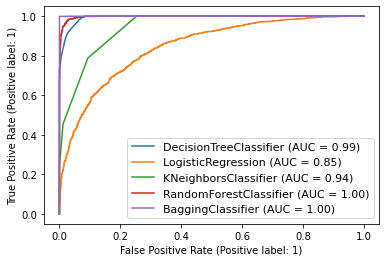

In [671]:
disp=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

ROC CURVE FOR TESTING

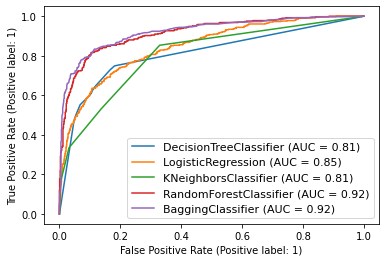

In [672]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

CONCLUSION-<BR>
--------------------

SINCE FOR LOGISTIC REGRESSION  THE DIFFERENCE BETWEEN THE CROSS VAL SCORE AND THE ACCURACY SCORE IS CONSIDERABLY LOWER AND THE DIFFERENCE BETWEEN THE TRAINING AND TESTTING SCORE IS THE LOWEST<BR><BR>
INDIVIDUAL TRAINING AND TESTING SCORES ARE AMONG THE HIGHEST GIVING IT A EDGE OVER OTHER MODELS<BR><BR>
ALSO IT MUST BE NOTED THAT FALSE POITIVES AND FALSE NEGATIVES SIGNIFICANTLY LOWER IN KNN AND THE AUC SCORES ARE ALSO SAME <BR><BR>
THESE FACTORS MAKE US CHOOSE LOGISTIC REGRESSION AS OUR BEST MODEL FOR THIS PROBLEM

In [673]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 82.94


CONFUSION MATRIX FOR THE TRAINIG


 [[4656  309]
 [ 790  687]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4965
           1       0.69      0.47      0.56      1477

    accuracy                           0.83      6442
   macro avg       0.77      0.70      0.73      6442
weighted avg       0.82      0.83      0.82      6442



Testing SCORE FOR THE LogisticRegression() is 82.93


CONFUSION MATRIX FOR THE TESTING


 [[1134   68]
 [ 207  202]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1202
           1       0.75      0.49      0.59       409

    accuracy                           0.83      1611
   macro avg       0.80      0.72      0.74      1611
weighted avg       0.82      0.83      0.82      1611



In [674]:
test_pred=knn.predict(x_test)
knn_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(knn,x_scaled,y,cv=5).mean()

In [675]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)


CROSS VAL SCORE IS  78.74

TEST ACCURACY SCORE IS  80.76


SAVING THE MODEL
------------------

In [676]:
with open('lrrr', 'wb') as files:
    pickle.dump(lr, files)